# Data Profiling and Cleaning

We profiled and cleaned the NYC opendata `DOB Job Application Filings` data using pandas and openclean

Run all the cells in order to profile and clean the data

Robert Ronan, Sheng Tong, Jerry Lee

In [1]:
import openclean
import glob
import pandas as pd
import numpy as np


# Data Downloading

Download the data using openClean

In [2]:
import gzip
import humanfriendly
import os

from openclean.data.source.socrata import Socrata

dataset = Socrata().dataset('ic3t-wcy2')
datafile = './ic3t-wcy2.tsv.gz'

if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        print('Downloading ...\n')
        dataset.write(f)


fsize = humanfriendly.format_size(os.stat(datafile).st_size)
print("Using '{}' in file {} of size {}".format(dataset.name, datafile, fsize))

Using 'DOB Job Application Filings' in file ./ic3t-wcy2.tsv.gz of size 257.98 MB


# Data Loading

Load the data into pandas and openClean dataset object

In [3]:
import pandas as pd
from openclean.pipeline import stream

df  = pd.read_csv(datafile, dtype='object', sep='\t')
ds = stream(datafile)

In [4]:
np.__version__

'1.18.5'

In [5]:
pd.__version__

'1.0.5'

In [6]:
import glob

In [7]:
glob.glob("*")

['Date_Profilling_And_Cleaning_For_Applicant.ipynb',
 'Date_Profilling_And_Cleaning_For_City_And_Description.ipynb',
 'Date_Profilling_And_Cleaning_For_Datetime_Data.ipynb',
 'DOB_Job_Cleaning.ipynb',
 'ic3t-wcy2.tsv.gz',
 'merged.ipynb']

### Get some basic info about the dataset columns

In [8]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774833 entries, 0 to 1774832
Data columns (total 96 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   Job #                          1774833 non-null  object
 1   Doc #                          1774833 non-null  object
 2   Borough                        1774833 non-null  object
 3   House #                        1774827 non-null  object
 4   Street Name                    1774827 non-null  object
 5   Block                          1774081 non-null  object
 6   Lot                            1774077 non-null  object
 7   Bin #                          1774833 non-null  object
 8   Job Type                       1774833 non-null  object
 9   Job Status                     1774833 non-null  object
 10  Job Status Descrp              1774833 non-null  object
 11  Latest Action Date             1774833 non-null  object
 12  Building Type               

If any rows are complete duplicates, drop them

In [9]:
df = df.drop_duplicates()

Take an a look at some of the rows to get an idea of what the datset looks like

In [10]:
df

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,440673497,01,QUEENS,215-02,93 AVENUE,10618,00028,4226672,A2,R,...,N,NaN,A1,0,40.720067,-73.742696,23,542,Queens Village,4226672
1,440673512,01,QUEENS,10040,222 STREET,10780,00019,4231025,A2,R,...,N,NaN,A1,0,40.714365,-73.731171,27,568,Queens Village,4231025
2,421133972,02,QUEENS,88-36,139TH STREET,09620,00033,4623670,NB,P,...,N,NaN,G7,0,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
3,421133972,03,QUEENS,88-36,139TH STREET,09620,00033,4623670,NB,P,...,N,NaN,G7,0,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
4,210182309,02,BRONX,97,WEST 169 STREET,02519,00027,2130622,NB,P,...,N,NaN,V0,0,40.839538,-73.923177,16,211,Highbridge,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774828,302042858,01,BROOKLYN,2770,OCEAN AVENUE,07404,00020,3202124,A3,X,...,N,NaN,D1,0,40.593831,-73.950368,48,592,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3202124
1774829,302042867,01,BROOKLYN,313,76 STREET,05940,00078,3148750,A2,R,...,N,NaN,B1,0,40.630611,-74.027435,43,66,Bay Ridge,3148750
1774830,302042876,01,BROOKLYN,1658,66 STREET,05559,00033,3134197,A2,X,...,N,NaN,C3,0,40.620486,-73.994067,38,252,Bensonhurst West,3134197
1774831,302042885,01,BROOKLYN,173,LEXINGTON AVENUE,01968,00043,3056361,A2,Q,...,N,NaN,F9,0,40.687159,-73.955516,36,233,Bedford,3056361


## Describe columns in groups so they fit on screen

In [11]:
df[df.columns[:20]].describe()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Cluster,Landmarked,Adult Estab,Loft Board,City Owned,Little e
count,1774833,1774833,1774833,1774827,1774827,1774081,1774077,1774833,1774833,1774833,1774833,1774833,1774833,1773538,1131340,1670714,1581393,1400794,149391,1046417
unique,1584287,20,5,35644,29552,13816,1971,363769,9,17,17,7373,2,106,2,4,2,2,4,5
top,103408705,01,MANHATTAN,1,BROADWAY,00016,00001,1015862,A2,X,SIGNED OFF,10/13/2017,OTHERS,105,N,N,N,N,Y,N
freq,20,1583861,775334,17359,52273,6808,216446,2413,1117073,1050347,1050347,793,1389719,210722,1122869,1461463,1581220,1393358,149388,989635


In [12]:
# Notes:
# Building Type looks binary and has 2 values + maybe NAN
# Cluster looks binary and has 2 values + maybe NAN
# Landmarked looks binary and has 4 values + maybe NAN
# Adult Establishment looks binary and has 2 values + maybe NAN
# Loft Board looks binary and has 2 values + maybe NAN
# City Owned looks binary and has 4 values + maybe NAN
# Little e looks binary and has 5 values + maybe NAN


In [13]:
df[df.columns[20:40]].describe()

,PC Filed,eFiling Filed,Plumbing,Mechanical,Boiler,Fuel Burning,Fuel Storage,Standpipe,Sprinkler,Fire Alarm,Equipment,Fire Suppression,Curb Cut,Other,Other Description,Applicant's First Name,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert
count,602206,1081480,555712,284297,49960,21452,14255,14386,116386,87703,306812,43370,61213,1041742,1039940,1774774,1774821,1774750,1725666,1396638
unique,2,2,1,1,1,1,2,1,1,1,1,1,1,1,16626,17353,35220,913,27087,5
top,Y,Y,X,X,X,X,X,X,X,X,X,X,X,X,GEN. CONSTR.,MICHAEL,HOQUE,PE,083278,Y
freq,384720,1081478,555712,284297,49960,21452,14254,14386,116386,87703,306812,43370,61213,1041742,316603,51058,19159,924243,19195,859575


In [14]:
# PC Filed -- Other all look binary, and have 1-2 values + maybe NAN
#
# Take a look at Other Description for weird strings

#  Lots of the same First and Last name

# Check names and titles

# APPLICATNT LICENCSE # NEEDS TO BE A STRING TO PERSERVE THE 0 ON IT (PROBABLY)

# Professional Cert looks binary and has 5 values + maybe NAN



In [15]:
df[df.columns[40:60]].describe()

,Pre- Filing Date,Paid,Fully Paid,Assigned,Approved,Fully Permitted,Initial Cost,Total Est. Fee,Fee Status,Existing Zoning Sqft,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Existing Dwelling Units
count,1774833,1765764,1768254,1195823,1444933,1309680,1774833,1774833,1774833,1774833,1774833,45822,32149,1774833,1774833,1774833,1774833,1774833,1774833,644092
unique,6622,6641,6708,6781,6887,6121,98624,93203,3,18057,24619,2,2,6970,1184,152,319,945,1102,1082
top,06/28/2019,06/28/2019,06/28/2019,07/01/2009,06/26/2008,11/12/2015,$0.00,$100.00,STANDARD,0,0,Y,Y,0,0,0,0,0,0,1
freq,1717,1700,1702,575,663,487,477545,144800,1600942,1704849,1672970,45815,32140,1713489,1677514,821444,396296,821462,454050,117779


In [16]:
# Need to convert date columns to pd.datetime
# RENAME PAID TO PAID DATE
# RENAME FULLY PAID TO FULLY PAID DATE
# RENAME ASSISGNED TO ASSIGNED DATE
# RENAME APPROVED TO APPROVED DATE

# CHECK COHERENCE OF PAID DATE <= FULLY PAID DATE
# CHECK COHERENCE OF PRE FILING DATE <= PAID DATE
# CHECK COHERENCE OF ASSIGNED DATE <= APPROVED DATE
# 

# REMOVE $ FROM Initial Cost and Total Estimated Fee, and put them in column name, convert values to floats

# Check What fee status is

# Check Existing Zoning Sqft, Propsed Zoning Sqft, Enlargement SQ Footage for reasonable values
# Change either Sqft to SQ Footage or vvice-versa

# Horizontal Enlargement and Vertical Enlargement are booleans + NAN
# Change Enlrgmt to Enlargement

#Chcek ExisitngNo. of Stories and Proposed # of Stories for reasonableness
# Add space between Existing and No.
# Change either Job# to Job No. or vice versa
# maybe just change all the No./# to "number"

# Check Existing and proposed height for reasonableness. Add unit to column name

# check Existing Dwelling Units for reasonableness 



In [17]:
df[df.columns[60:80]].describe()

,Proposed Dwelling Units,Existing Occupancy,Proposed Occupancy,Site Fill,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Owner Type,Non-Profit,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #
count,918738,1270588,1062751,1424995,1440051,193632,10263,262130,79909,1701439,1703286,1774553,1774618,1424233,1003,1003,1003,1003,1001,1763366
unique,1173,47,49,5,229,196,135,116,15,14,2,93115,156866,412712,549,756,114,9,212,359264
top,1,RES,RES,NOT APPLICABLE,R6,R8B,C6-6,MID,POPS,CORPORATION,N,MICHAEL,SINGH,OWNER,2,555 WEST 23RD STREET,BROOKLYN,NY,11201,7184728000
freq,172057,411650,289996,717112,149653,19305,1554,84261,27848,575526,1594148,40957,23629,11053,19,17,309,981,46,12731


In [18]:
# check Proposed Dwelling Units
## Why does Existing Occupancy have fewer cats than Proposed Occupancy. Check those.

# What is Site Fill. 

# Get list of NYC ZOning Districts and Special Districts

# Checmk Owner Typer for spelling issues

# Non Profit is binary

# Check Owners's First and last name

# Owner'sBuisness Name should not be "OWNER"

# Owner's house number, streeet name, city, state and zip have almost no values

# Why is the same phone number so common

In [19]:
df[df.columns[80:100]].describe()

,Job Description,DOBRunDate,JOB_S1_NO,TOTAL_CONSTRUCTION_FLOOR_AREA,WITHDRAWAL_FLAG,SIGNOFF_DATE,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
count,1594497,1774833,1774833,1774833,1774833,1063242,1754629,172179,1768356,1774833,1769176,1769176,1769176,1769176,1769176,1752710
unique,1247237,297,1774833,26598,13,5919,4,6373,199,13,217559,228333,51,1328,194,342789
top,PROPOSED INSTALLATION OF HEAVY DUTY SIDEWALK S...,04/28/2021 00:00:00,2303095,0,0,02/12/2018,N,10/24/2012,R0,0,40.748276,-73.984690,4,7,Midtown-Midtown South,3000000
freq,3985,1676399,1,1619529,1752630,603,1519403,5513,209462,1772918,2409,2413,236660,16439,153870,15627


In [20]:

# That is a lot of unique job descriptions

# Add spaces to DOB Run Date name
# make DOB Run Date a datetime

# What is Job_S1_NO. It uses underscores.

# All the remaining columns have ALL CAPS NAMES WITH UNDERSCORES 
# TOTAL_CONSTRUCTION_FLOOR_AREA, WITHDRAWAL_FLAG

# SIGNOFF_DATE needs to be datetime
# SPECIAL_ACTION_STATUS
# SPECIAL_ACTION_DATE needs to be datetime
# BUILDING_CLASS
# What is JOB_NO_GOOD_COUNT
#
# maybe need GIS DATA
# GIS_LATITUDE
# GIS_LONGITUDE
# GIS_COUNCIL_DISTRICT
# GIS_CENSUS_TRACT
# GIS_NTA_NAME
# GIS_BIN
# 

In [21]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

## Renaming columns

In [4]:
df = df.rename(columns={
                          "Owner'sPhone #": "Owner's Phone #" 
                        , "Owner'sHouse Street Name": "Owner's House Street Name"
                        , "Paid": "Paid Date"
                        , "Fully Paid": "Fully Paid Date"
                        , "Assigned": "Assigned Date"
                        , "Approved": "Approved Date"
                        , "Job Status Descrp": "Job Status Description"
                        , "Community - Board": "Community Board"
                        , "Adult Estab": "Adult Establishment"
                        , "Pre- Filing Date": "Pre-Filing Date"
                        , "Total Est. Fee": "Total Estimated Fee"
                        , "Horizontal Enlrgmt": "Horizontal Enlargement"
                        , "Vertical Enlrgmt": "Vertical Enlargement"
                        , "ExistingNo. of Stories": "Existing # of Stories"
                        , "Proposed No. of Stories": "Proposed # of Stories"
                        , "Zoning Dist1": "Zoning District 1"
                        , "Zoning Dist2": "Zoning District 2"
                        , "Zoning Dist3": "Zoning District 3"
                        , "City ": "Owner's House City"
                        , "State": "Owner's House State"
                        , "Zip": "Owner's House Zip"
                        , "DOBRunDate": "DOB Run Date"
                       })

#Lower cased but not sure if this is necessary
'''
df = df.rename(columns={
                        , "JOB_S1_NO": "Job S1 #"
                        , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"
                        , "WITHDRAWAL_FLAG": "Withdrawl Flag"
                        , "SIGNOFF_DATE": "Signoff Date"
                        , "SPECIAL_ACTION_STATUS": "Special Action Status"
                        , "SPECIAL_ACTION_DATE": "Special Action Date"
                        , "BUILDING_CLASS": "Building Class"
                        , "JOB_NO_GOOD_COUNT": "Job No Good Count"
                        , "GIS_LATITUDE": "GIS Latitude"
                        , "GIS_LONGITUDE": "GIS Longitude"
                        , "GIS_COUNCIL_DISTRICT": "GIS Council District"
                        , "GIS_CENSUS_TRACT": "GIS Census Tract"
                        , "GIS_NTA_NAME": "GIS NTA Name"
                        , "GIS_BIN": "GIS Bin"
                        })
'''

'\ndf = df.rename(columns={\n                        , "JOB_S1_NO": "Job S1 #"\n                        , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"\n                        , "WITHDRAWAL_FLAG": "Withdrawl Flag"\n                        , "SIGNOFF_DATE": "Signoff Date"\n                        , "SPECIAL_ACTION_STATUS": "Special Action Status"\n                        , "SPECIAL_ACTION_DATE": "Special Action Date"\n                        , "BUILDING_CLASS": "Building Class"\n                        , "JOB_NO_GOOD_COUNT": "Job No Good Count"\n                        , "GIS_LATITUDE": "GIS Latitude"\n                        , "GIS_LONGITUDE": "GIS Longitude"\n                        , "GIS_COUNCIL_DISTRICT": "GIS Council District"\n                        , "GIS_CENSUS_TRACT": "GIS Census Tract"\n                        , "GIS_NTA_NAME": "GIS NTA Name"\n                        , "GIS_BIN": "GIS Bin"\n                        })\n'

#### Method to get an idea of the top 10 values of a column

In [23]:
def show_vals(column_name, show_rows=10, df=df):
    print("Top {} {}:\n".format(show_rows, column_name))
    print(df[column_name].value_counts(dropna=False)[:show_rows])
    print()

### Examining Job #s

Some repition in the Job #'s, but nothing major. We will check some of the repeated Job #s to be sure they actually refer to the same jobs

In [24]:
df['Job #'].value_counts(dropna=False)

103408705    20
122705000    13
120438240    13
320843110    12
200478250    11
             ..
401750681     1
440162985     1
104653992     1
240239041     1
401554448     1
Name: Job #, Length: 1584287, dtype: int64

Nothing weird looking here

In [25]:
df['Job #'].min()

'100321046'

In [26]:
df['Job #'].max()

'577777776'

No Job #s starting with 0, so there are integer values, unlike Doc # which has values 01, 02, etc.

In [27]:
df.loc[df['Job #'].str.startswith('0')]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN


Fraction of Rows with unique job numbers

In [28]:
df['Job #'].nunique()/df['Job #'].count()

0.8926400399361517

Group by Job # and check if latitude and longitude are the same all the same for the job, which would indicate different instances of the Job # all refer to the same Job.

In [29]:
group = df[['Job #', 'GIS_LATITUDE', 'GIS_LONGITUDE']].groupby('Job #')

This will take a little while to run

In [30]:
tranformed = group.aggregate(lambda x: x.unique().shape[0])

Jobs with multiple latitude and longitudes:

In [31]:
# 107 potential bad jobs
tranformed.loc[(tranformed['GIS_LATITUDE']!=1)
              |(tranformed['GIS_LONGITUDE']!=1)]

,GIS_LATITUDE,GIS_LONGITUDE
Job #,,
102724759,2,2
102769489,2,2
102875569,2,2
102904467,2,2
103122372,2,2
...,...,...
500592110,2,2
500592138,2,2
500592147,2,2


In [32]:
potential_bad_jobs = list(tranformed.loc[(tranformed['GIS_LATITUDE']!=1)
              |(tranformed['GIS_LONGITUDE']!=1)].index.unique())

Separate these into a temporary dataframe to play around with:

In [33]:
df_temp = df.loc[df['Job #'].isin(potential_bad_jobs)].copy()

In [34]:
df_temp = df_temp.sort_values(['Job #', 'GIS_LATITUDE', 'GIS_LONGITUDE'])

Most of these are just missing lat and long values.

The others look to be Jobs that manage multiple houses/lots in a small area, so are probably correct

In [35]:
df_temp[df_temp.duplicated(subset=['Job #', 'Block', 'Lot', 'Bin #', 'Job Type'], keep=False)]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
1343884,102724759,01,MANHATTAN,111,8 AVENUE,00739,00001,1013043,A2,R,...,W,05/17/2019,O6,0,40.740704,-74.001844,3,83,Hudson Yards-Chelsea-Flatiron-Union Square,1013043
76193,102724759,03,MANHATTAN,NaN,NaN,00739,00001,1013043,A2,P,...,W,05/17/2019,O6,0,NaN,NaN,NaN,NaN,NaN,NaN
76790,102724759,02,MANHATTAN,NaN,NaN,00739,00001,1013043,A2,G,...,W,05/17/2019,O6,0,NaN,NaN,NaN,NaN,NaN,NaN
1378249,102769489,02,MANHATTAN,1130,ST NICHOLAS AVENUE,02124,00021,1062989,NB,X,...,A,NaN,I9,0,40.839949,-73.939761,10,251,Washington Heights South,1062989
1378256,102769489,03,MANHATTAN,1130,ST NICHOLAS AVENUE,02124,00021,1062989,NB,X,...,A,NaN,I9,0,40.839949,-73.939761,10,251,Washington Heights South,1062989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261756,500461895,01,STATEN ISLAND,1135,WOODROW ROAD,06108,00059,5135616,NB,X,...,N,NaN,B2,0,40.542311,-74.202647,51,20801,Rossville-Woodrow,5135616
261757,500461895,02,STATEN ISLAND,1135,WOODWARD ROAD,06108,00059,5135616,NB,X,...,A,NaN,B2,0,NaN,NaN,NaN,NaN,NaN,NaN
1132705,520305937,03,STATEN ISLAND,2636,HYLAN BOULEVARD,03969,00031,5171652,NB,R,...,N,NaN,K6,0,40.567461,-74.112766,50,12804,New Dorp-Midland Beach,5000000
11232,520305937,01,STATEN ISLAND,2636,HYLAND BOULEVARD,03969,00031,5171652,NB,R,...,N,NaN,K6,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Later, after we have cleaned more values, we will fill these missing values by job #

Remove Jobs we know to be just missing data from the list of bad jobs

In [36]:
not_bad_jobs = df_temp[df_temp.duplicated(subset=['Job #', 'Block', 'Lot', 'Bin #', 'Job Type'], keep=False)]['Job #'].unique()

In [37]:
df_temp = df_temp.loc[~df_temp['Job #'].isin(not_bad_jobs)]

All of these are jobs that handle multiple lots or House #s, which explains why the lat/long change 

Job # 122171130 and 122222638 may be exact copies of each other though

In [38]:
df_temp

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
44588,103128679,02,MANHATTAN,2700,BROADWAY,01875,00018,1056563,NB,R,...,A,NaN,R0,0,40.798924,-73.967851,7,191,Upper West Side,1056563
1442151,103128679,01,MANHATTAN,2692,BROADWAY,01875,07501,1056563,NB,R,...,N,NaN,R0,0,40.799201,-73.968480,7,191,Upper West Side,1056563
1468530,103403899,02,MANHATTAN,2700,BROADWAY,01875,00018,1056563,A1,R,...,W,08/24/2015,R0,0,40.798924,-73.967851,7,191,Upper West Side,1056563
1468529,103403899,01,MANHATTAN,2692,BROADWAY,01875,07501,1056563,A1,R,...,W,08/24/2015,R0,0,40.799201,-73.968480,7,191,Upper West Side,1056563
642311,121347266,02,MANHATTAN,120,CLAREMONT AVENUE,01993,00001,1083664,A2,X,...,N,NaN,W6,0,40.812475,-73.961931,7,211,Morningside Heights,1076684
640514,121347266,01,MANHATTAN,132,CLAREMONT AVENUE,01993,00002,1083664,A2,X,...,N,NaN,W6,0,40.812769,-73.961714,7,211,Morningside Heights,1083664
839830,122171130,02,MANHATTAN,200,VESEY STREET,00016,00140,1000059,A2,X,...,N,NaN,O4,0,40.714447,-74.015493,1,31703,Battery Park City-Lower Manhattan,1000059
839829,122171130,01,MANHATTAN,250,VESEY STREET,00016,00150,1000060,A2,X,...,N,NaN,O4,0,40.714529,-74.015677,1,31703,Battery Park City-Lower Manhattan,1000060
855274,122222638,02,MANHATTAN,200,VESEY STREET,00016,00140,1000059,A2,X,...,N,NaN,O4,0,40.714447,-74.015493,1,31703,Battery Park City-Lower Manhattan,1000059
855273,122222638,01,MANHATTAN,250,VESEY STREET,00016,00150,1000060,A2,X,...,N,NaN,O4,0,40.714529,-74.015677,1,31703,Battery Park City-Lower Manhattan,1000060


In [39]:
df_temp = df_temp.loc[(df_temp['Job #'].isin(['122171130', '122222638']))]

Latest action date is different, so its probably differnt but very similar jobs 

In [40]:
df_temp[df_temp.columns[0:20]]


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Description,Latest Action Date,Building Type,Community Board,Cluster,Landmarked,Adult Establishment,Loft Board,City Owned,Little e
839830,122171130,02,MANHATTAN,200,VESEY STREET,00016,00140,1000059,A2,X,SIGNED OFF,09/19/2017,OTHERS,101,N,N,NaN,N,Y,NaN
839829,122171130,01,MANHATTAN,250,VESEY STREET,00016,00150,1000060,A2,X,SIGNED OFF,09/19/2017,OTHERS,101,N,N,N,N,Y,N
855274,122222638,02,MANHATTAN,200,VESEY STREET,00016,00140,1000059,A2,X,SIGNED OFF,12/14/2015,OTHERS,101,N,N,NaN,N,Y,NaN
855273,122222638,01,MANHATTAN,250,VESEY STREET,00016,00150,1000060,A2,X,SIGNED OFF,12/14/2015,OTHERS,101,N,N,N,N,Y,N


Check if any Job #s have non-digit values

In [41]:
df['Job #'] = df['Job #'].astype('str')

In [42]:
df.loc[(~df['Job #'].isna())
       &(~df['Job #'].str.isdigit())]['Job #']

Series([], Name: Job #, dtype: object)

All Job #s entirely composed of digits, so we cast them to ints

In [43]:
df['Job #'] = df['Job #'].astype('int')

In [44]:
df['Job #'].describe()

count    1.774833e+06
mean     2.518866e+08
std      1.355759e+08
min      1.003210e+08
25%      1.212317e+08
50%      2.206184e+08
75%      4.011184e+08
max      5.777778e+08
Name: Job #, dtype: float64

## Examining and reparing house #s

House #'s appear to be mostly ints

However, there are legitimate house numbers with dashes so we'll have to make them strings

In [45]:
show_vals('House #', show_rows=10)

Top 10 House #:

1      17359
200    11853
100     8114
11      7231
10      7191
55      7166
40      7105
30      7098
2       6428
150     6380
Name: House #, dtype: int64



Replace NaN values with empty strings, then convert column to string, and make everything uppercase


In [46]:
df['House #'].fillna('', inplace=True)
df['House #'] = df['House #'].astype('str')
df['House #'] = df['House #'].str.upper()

Check for numbers spelled out as words

In [47]:
df.loc[(~df['House #'].isna())
       &(df['House #'].str.isalpha())]['House #']

15518            ONE
1173923         PIER
1180672         PIER
1345608          ONE
1345775          ONE
1378177          ONE
1400115          ONE
1405711          ONE
1513684    MANHATTAN
Name: House #, dtype: object

Maybe the house # and borough were flipped in the 'manhattan' case?

In [48]:
# Nope:
df.loc[df['House #'].str.strip('')=='MANHATTAN'][['House #', 'Borough']]

,House #,Borough
1513684,MANHATTAN,MANHATTAN


Check if thses are empty strings:

In [49]:
df.loc[(~df['House #'].str.contains('\\d', regex=True))]['House #']

15518            ONE
76193               
76377               
76788               
76790               
76796               
76800               
685608     NO NUMBER
1173923         PIER
1180672         PIER
1345608          ONE
1345775          ONE
1378177          ONE
1400115          ONE
1405711          ONE
1513684    MANHATTAN
Name: House #, dtype: object

Replace spelling of numbers with their value, and remove values 'PIER',  'MANHATTAN',  'NO NUMBER'

In [50]:
df.loc[df['House #'].str.strip('')=='ONE', 'House #'] = '1'
df.loc[df['House #'].str.strip('')=='PIER', 'House #'] = ''
df.loc[df['House #'].str.strip('')=='MANHATTAN', 'House #'] = ''
df.loc[df['House #'].str.strip('')=='NO NUMBER', 'House #'] = ''


Most of these will probably be legitimate house numbers, since house numbers can have dashes

In [51]:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())]['House #']

0           215-02
2            88-36
3            88-36
6            34-74
15           34-74
            ...   
1774620    186-200
1774621    186-200
1774647    372-380
1774670    633-639
1774815      26-28
Name: House #, Length: 332176, dtype: object

Check non-numeric house #'s that don't have dashes

In [52]:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())
      &(~df['House #'].str.contains('-', regex=False))]['House #'][:25]

37            215B
71          270GAR
76          9 WEST
263          1715A
264          1715A
265          1715A
297           327A
326           327A
522           687A
550          76GAR
556          2529A
604       1414 GAR
659       368 REAR
683            66A
731           563A
815           128A
900     536 GARAGE
960          563 A
999       1058 GAR
1030      1243 GAR
1080         40GAR
1084     2923 REAR
1103       279 GAR
1106        126GAR
1153        55 GAR
Name: House #, dtype: object

We see a mix of reference to the house's garage, the rear house and single letters that likely indicate apartments in multi-occupancy venues. 

We will standardize the formatting, and maintain the reference to garage, rear, and appartment, since there is no apartment column for the job.

First split the numbers and words with a space

In [53]:
df['House #'] = df['House #'].str.replace(pat='(?P<one>\\d)(?P<two>[A-Z]+)', repl='\g<one> \g<two>', regex=True)

Now we will fix the formatting for garage and 
remove references to north, south, east, west, since they should be in street #

In [54]:
df['House #'] = df['House #'].str.replace(pat='(?P<one>GAR$)', repl='GARAGE', regex=True)

In [55]:
df['House #'] = df['House #'].str.replace(pat='NORTH([A-Z]+)?', repl='', regex=True)
df['House #'] = df['House #'].str.replace(pat='EAST([A-Z]+)?', repl='', regex=True)
df['House #'] = df['House #'].str.replace(pat='SOUTH([A-Z]+)?', repl='', regex=True)
df['House #'] = df['House #'].str.replace(pat='WEST([A-Z]+)?', repl='', regex=True)

In [56]:
# Confirm that it worked correctly:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())
       &(~df['House #'].str.contains('-', regex=False))]['House #'][:30]

37            215 B
71       270 GARAGE
76               9 
263          1715 A
264          1715 A
265          1715 A
297           327 A
326           327 A
522           687 A
550       76 GARAGE
556          2529 A
604     1414 GARAGE
659        368 REAR
683            66 A
731           563 A
815           128 A
900      536 GARAGE
960           563 A
999     1058 GARAGE
1030    1243 GARAGE
1080      40 GARAGE
1084      2923 REAR
1103     279 GARAGE
1106     126 GARAGE
1153      55 GARAGE
1154      51 GARAGE
1164         2769 A
1206           24 A
1344     122 CANOPY
1380           80 A
Name: House #, dtype: object

## Looking at Binary/Pseudo-binary columns:

For these columns it's clear NaN idicates 'no', since the only other option was 'X' which indicates yes

In [57]:
show_vals('Plumbing')
show_vals('Mechanical')
show_vals('Boiler')
show_vals('Fuel Burning')
show_vals('Fuel Storage')
show_vals('Standpipe')
show_vals('Sprinkler')
show_vals('Fire Alarm')
show_vals('Equipment')
show_vals('Fire Suppression')
show_vals('Curb Cut')
show_vals('Other')

Top 10 Plumbing:

NaN    1219121
X       555712
Name: Plumbing, dtype: int64

Top 10 Mechanical:

NaN    1490536
X       284297
Name: Mechanical, dtype: int64

Top 10 Boiler:

NaN    1724873
X        49960
Name: Boiler, dtype: int64

Top 10 Fuel Burning:

NaN    1753381
X        21452
Name: Fuel Burning, dtype: int64

Top 10 Fuel Storage:

NaN    1760578
X        14254
N            1
Name: Fuel Storage, dtype: int64

Top 10 Standpipe:

NaN    1760447
X        14386
Name: Standpipe, dtype: int64

Top 10 Sprinkler:

NaN    1658447
X       116386
Name: Sprinkler, dtype: int64

Top 10 Fire Alarm:

NaN    1687130
X        87703
Name: Fire Alarm, dtype: int64

Top 10 Equipment:

NaN    1468021
X       306812
Name: Equipment, dtype: int64

Top 10 Fire Suppression:

NaN    1731463
X        43370
Name: Fire Suppression, dtype: int64

Top 10 Curb Cut:

NaN    1713620
X        61213
Name: Curb Cut, dtype: int64

Top 10 Other:

X      1041742
NaN     733091
Name: Other, dtype: int64



Replace the Nan values with False and replace the 'X' values with True, and then cast the columns to be type bool

In [58]:
df['Plumbing'].fillna(False, inplace=True)
df['Mechanical'].fillna(False, inplace=True)
df['Boiler'].fillna(False, inplace=True)
df['Fuel Burning'].fillna(False, inplace=True)
df['Adult Establishment'].fillna(False, inplace=True)
df['Fuel Storage'].fillna(False, inplace=True)
df['Standpipe'].fillna(False, inplace=True)
df['Sprinkler'].fillna(False, inplace=True)
df['Fire Alarm'].fillna(False, inplace=True)
df['Fire Suppression'].fillna(False, inplace=True)
df['Curb Cut'].fillna(False, inplace=True)
df['Other'].fillna(False, inplace=True)

In [59]:
df.loc[df['Plumbing']!=False, 'Plumbing'] = True
df.loc[df['Mechanical']!=False, 'Mechanical'] = True
df.loc[df['Fuel Burning']!=False, 'Fuel Burning'] = True
df.loc[df['Adult Establishment']!=False, 'Adult Establishment'] = True
df.loc[df['Fuel Storage']!=False, 'Fuel Storage'] = True
df.loc[df['Standpipe']!=False, 'Standpipe'] = True
df.loc[df['Sprinkler']!=False, 'Sprinkler'] = True
df.loc[df['Fire Alarm']!=False, 'Fire Alarm'] = True
df.loc[df['Fire Suppression']!=False, 'Fire Suppression'] = True
df.loc[df['Curb Cut']!=False, 'Curb Cut'] = True
df.loc[df['Other']!=False, 'Other'] = True

In [60]:
df['Plumbing'] = df['Plumbing'].astype('bool')
df['Mechanical'] = df['Mechanical'].astype('bool')
df['Boiler'] = df['Boiler'].astype('bool')
df['Fuel Burning'] = df['Fuel Burning'].astype('bool')
df['Adult Establishment'] = df['Adult Establishment'].astype('bool')
df['Fuel Storage'] = df['Fuel Storage'].astype('bool')
df['Standpipe'] = df['Standpipe'].astype('bool')
df['Sprinkler'] = df['Sprinkler'].astype('bool')
df['Fire Alarm'] = df['Fire Alarm'].astype('bool')
df['Fire Suppression'] = df['Fire Suppression'].astype('bool')
df['Curb Cut'] = df['Curb Cut'].astype('bool')
df['Other'] = df['Other'].astype('bool')

In [61]:

# Notes:
# Building Type looks binary and has 2 values + maybe NAN
# Cluster looks binary and has 2 values + maybe NAN
# Landmarked looks binary and has 4 values + maybe NAN
# Adult Establishment looks binary and has 2 values + maybe NAN
# Loft Board looks binary and has 2 values + maybe NAN
# City Owned looks binary and has 4 values + maybe NAN
# Little e looks binary and has 5 values + maybe NAN
# PC Filed -- Other all look binary, and have 1-2 values + maybe NAN
#
# Take a look at Other Description for weird strings

# Professional Cert looks binary and has 5 values + maybe NAN
# Non Profit is binary



These columns are less clear cut since they have yes, no, and NaN values

With the exception of "Landmarked" and "Little e", which both have additional values at high frequency, we can probably assume with relatively high confidence that NaN values would indicate false values for these columns, and we will map the columns to boolean values. 

For Landmarked and Little e, we will map NaN to 'N', and leave all the values as strings

In [62]:
show_vals('Landmarked')
show_vals('Loft Board')
show_vals('City Owned')
show_vals('Little e')
show_vals('PC Filed')
show_vals('eFiling Filed')
show_vals('Professional Cert')
show_vals('Non-Profit')
show_vals('Horizontal Enlargement')
show_vals('Vertical Enlargement')

Top 10 Landmarked:

N      1461463
Y       208859
NaN     104119
L          369
C           23
Name: Landmarked, dtype: int64

Top 10 Loft Board:

N      1393358
NaN     374039
Y         7436
Name: Loft Board, dtype: int64

Top 10 City Owned:

NaN    1625442
Y       149388
I            1
M            1
N            1
Name: City Owned, dtype: int64

Top 10 Little e:

N      989635
NaN    728416
Y       36055
H       20722
M           4
X           1
Name: Little e, dtype: int64

Top 10 PC Filed:

NaN    1172627
Y       384720
N       217486
Name: PC Filed, dtype: int64

Top 10 eFiling Filed:

Y      1081478
NaN     693353
R            2
Name: eFiling Filed, dtype: int64

Top 10 Professional Cert:

Y      859575
N      537059
NaN    378195
J           2
F           1
R           1
Name: Professional Cert, dtype: int64

Top 10 Non-Profit:

N      1594148
Y       109138
NaN      71547
Name: Non-Profit, dtype: int64

Top 10 Horizontal Enlargement:

NaN    1729011
Y        45815
N           

Fill null values with False/'N'

In [63]:
df['Landmarked'].fillna('N', inplace=True)
df['Little e'].fillna('N', inplace=True)
df.loc[df['Little e']=='X', 'Little e'] = 'Y' # fix this one-off value for Little e


For the clearly binary cases, fill 'Y' values with True, and the other values with False

In [64]:
df.loc[df['Loft Board']=='Y', 'Loft Board'] = True
df.loc[df['City Owned']=='Y', 'City Owned'] = True
df.loc[df['PC Filed']=='Y', 'PC Filed'] = True
df.loc[df['eFiling Filed']=='Y', 'eFiling Filed'] = True
df.loc[df['Professional Cert']=='Y', 'Professional Cert'] = True
df.loc[df['Non-Profit']=='Y', 'Non-Profit'] = True
df.loc[df['Horizontal Enlargement']=='Y', 'Horizontal Enlargement'] = True
df.loc[df['Vertical Enlargement']=='Y', 'Vertical Enlargement'] = True



df.loc[df['Loft Board']!=True, 'Loft Board'] = False
df.loc[df['City Owned']!=True, 'City Owned'] = False
df.loc[df['PC Filed']!=True, 'PC Filed'] = False
df.loc[df['eFiling Filed']!=True, 'eFiling Filed'] = False
df.loc[df['Professional Cert']!=True, 'Professional Cert'] = False
df.loc[df['Non-Profit']!=True, 'Non-Profit'] = False
df.loc[df['Horizontal Enlargement']!=True, 'Horizontal Enlargement'] = False
df.loc[df['Vertical Enlargement']!=True, 'Vertical Enlargement'] = False


In [65]:
df['Loft Board'] = df['Loft Board'].astype('bool')
df['City Owned'] = df['City Owned'].astype('bool')
df['PC Filed'] = df['PC Filed'].astype('bool')
df['eFiling Filed'] = df['eFiling Filed'].astype('bool')
df['Professional Cert'] = df['Professional Cert'].astype('bool')
df['Non-Profit'] = df['Non-Profit'].astype('bool')
df['Horizontal Enlargement'] = df['Horizontal Enlargement'].astype('bool')
df['Vertical Enlargement'] = df['Vertical Enlargement'].astype('bool')


There does not appear to be anything particularly coherent about the jobs Landmarked or Little e have non-yes/no values

In [66]:
df.loc[~df['Landmarked'].isin(['Y', 'N'])]['Job Description'].value_counts()[:10]

TOWER 570 CONFERENCE CENTER       1
HAYDEN HALL                       1
DESANTOS                          1
L + F HOLDING CORP                1
CASA ITALIANA                     1
WESTSIDE CLUB                     1
GORDON RAMSAY AT THE LONDON       1
ST REGIS ROOF                     1
COLUMBUS 72                       1
NY CITY CENTER REHEARSAL SPACE    1
Name: Job Description, dtype: int64

In [67]:
df.loc[~df['Landmarked'].isin(['Y', 'N'])][["Owner's First Name", "Owner's Last Name","Owner's Business Name", "Owner's Phone #"]]

,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's Phone #
21720,EILEEN,TORRES,"BRONXWORKS, INC",7185083153
23443,TEITELBAUM,LEOPOLD,UTA,7189639260
23720,CHRISTOPHER,CAREY,HARMONIE CLUB,2123557400
23794,DAVID,SALCFAS,ALCONQUIN HOTEL TMES SQ.,2124199330
24401,TOM,JAVITIS,METROPOLITAN MUSEUM OF ART,2126502198
...,...,...,...,...
1601633,MARC,HASKELL,FIFTH AVE BALLROOM LLC,9175326400
1601658,HELMUNT,KROMAR,THE BANK OF NEW YORK,2126356441
1601675,RUSS,CHINNICI,1 BLEECKER STREET ASSOCIATES,9177506701
1601685,ANN,RENGANRDCHI,NaN,5162985929


These have very long + high frequncy job descriptions but it's not clear why

In [68]:
df.loc[~df['Little e'].isin(['Y', 'N'])]['Job Description'].value_counts()[:4]

REMOVAL AND INSTALLATION OF INTERIOR NON BEARING PARTITIONS AND RELATED FINISHES AS PER PLANS FILED HEREWITH.FILED IN CONJUCTION WITH ALTERATION 1 NUMBER 110463356. NO CHANGE IN USE, EGRESS OR OCCUPANCY UNDER THIS APPLICATION. JOB IS REVIEWED UNDER 2008 CODE IN CONJUNCTION WITH ALT 1 APPLICATION 110463356.    103
INSTALLATION OF SCAFFOLD AS PER DRAWINGS. SCAFFOLD SHALL COMPLY WITH CHAPTER #33 OF THE 2008 CODE. NO CHANGE IN USE, OCCUPANCY OR EGRESS UNDER THIS APPLICATION.                                                                                                                                                        64
HVAC AND MECHANICAL MODIFICATIONS AS PER PLANS FILED  AS PER PLANS FILED. FILED IN CONJUNCTION WITH ALTERATION TYPE 1 APPLICATION 110463356.  NO CHANGE IN USE, EGRESS OR OCCUPANCY UNDER THIS APPLICATION.JOB IS REVIEWED UNDER 2008 CODE IN CONJUNCTION WITH ALT 1 APPLICATION 110463356.                             55
PROPOSED INSTALLATION OF HEAVY DUTY SIDEWALK SHED FILED

## Checking Monetary Values for consistency

In [82]:
show_vals("Initial Cost")
show_vals("Total Estimated Fee")

Top 10 Initial Cost:

$0.00        477545
$10000.00     57794
$1000.00      55261
$3000.00      51157
$5000.00      50529
$20000.00     43246
$15000.00     38850
$25000.00     35436
$30000.00     30253
$50000.00     30054
Name: Initial Cost, dtype: int64

Top 10 Total Estimated Fee:

$100.00    144800
$0.00       58846
$160.00     58050
$130.00     55733
$225.00     42217
$140.00     33609
$200.00     31413
$191.50     26906
$294.50     20432
$346.00     18524
Name: Total Estimated Fee, dtype: int64



In [83]:
df['Initial Cost'] = df['Initial Cost'].astype('str')
df['Total Estimated Fee'] = df['Total Estimated Fee'].astype('str')

Check if any values are not decimals

In [84]:
df.loc[~df["Initial Cost"].str.contains(".", regex=False)]["Initial Cost"].value_counts()

Series([], Name: Initial Cost, dtype: int64)

In [85]:
df.loc[~df["Total Estimated Fee"].str.contains(".", regex=False)]["Total Estimated Fee"].value_counts()

Series([], Name: Total Estimated Fee, dtype: int64)

Dollar signs should be removed and added to column name so we can treat this column as a number

In [86]:
df["Total Estimated Fee"] = df["Total Estimated Fee"].str.replace("$", '', regex=False)

In [87]:
df["Initial Cost"] = df["Initial Cost"].str.replace("$", '', regex=False)

However we can't convert this to integer dollars because there are decimals.

In [88]:
df.loc[df["Initial Cost"].str.contains("\\.[^0]", regex=True)]["Initial Cost"]

43007      387329.94
63867      701803.69
65979       70656.25
324648      78474.75
672586     189851.98
1763781       269.23
Name: Initial Cost, dtype: object

Convert to floats

In [89]:
df["Initial Cost"] = df["Initial Cost"].astype('float')
df['Total Estimated Fee'] = df['Total Estimated Fee'].astype('float')

In [90]:
show_vals("Initial Cost")

Top 10 Initial Cost:

0.0         477545
10000.0      57794
1000.0       55261
3000.0       51157
5000.0       50529
             ...  
17700.0         90
875000.0        89
35100.0         89
294000.0        89
10.0            89
Name: Initial Cost, Length: 771, dtype: int64



In [91]:
df['Total Estimated Fee'].value_counts(dropna=False)

100.00     144800
0.00        58846
160.00      58050
130.00      55733
225.00      42217
            ...  
3091.97         1
2444.86         1
4277.20         1
2891.18         1
9045.14         1
Name: Total Estimated Fee, Length: 93203, dtype: int64

For unclear reasons, adding xticks makes this plot incredibly slow to display.

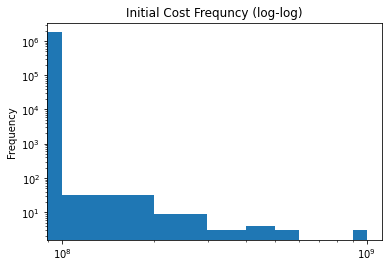

In [92]:
df["Initial Cost"].plot(kind='hist', loglog=True, title='Initial Cost Frequncy (log-log)')

Intial costs appear to be distributed roughly exponentially 

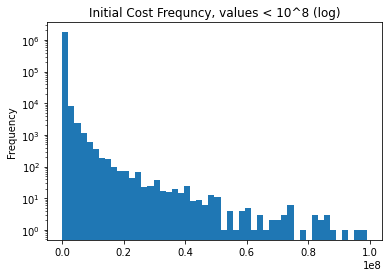

In [93]:
df.loc[df["Initial Cost"]<10**8]["Initial Cost"].plot(kind='hist', logy=True, bins=50, title='Initial Cost Frequncy, values < 10^8 (log)')

Plotting total estimated fee shows it is also roughly exponential in distribution

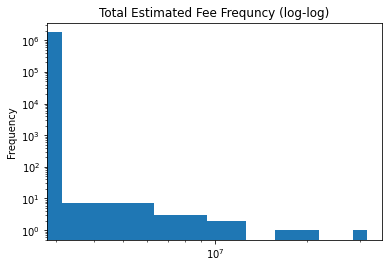

In [94]:
df["Total Estimated Fee"].plot(kind='hist', loglog=True, title='Total Estimated Fee Frequncy (log-log)')

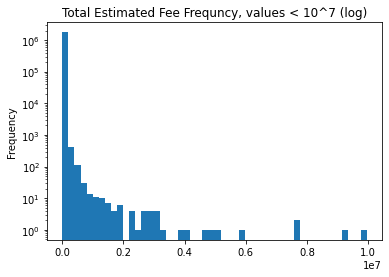

In [95]:
df.loc[df["Total Estimated Fee"]<10**7]["Total Estimated Fee"].plot(kind='hist', logy=True, bins=50, title='Total Estimated Fee Frequncy, values < 10^7 (log)')

Now that we've mapped these to numerical values, we can identifiy additional issues

#### Fixing Initial costs

In [96]:
# Not possible
df["Initial Cost"].min()

-33000.0

In [97]:
# Obviously a fill-in
df["Initial Cost"].max()

999999999.0

In [98]:
df.loc[df['Initial Cost'] < 0]['Initial Cost']

76205    -33000.0
269866     -100.0
Name: Initial Cost, dtype: float64

It's likely that these values were mistakenly entered as negative, so we'll flip them to positive instead of setting them to zero

In [99]:
df.loc[df['Initial Cost'] == -33000.0, 'Initial Cost'] = 33000.0
df.loc[df['Initial Cost'] == -100.0, 'Initial Cost'] = 100.0

This is test data:

In [100]:
#the entire line is filled with fake and false information
# The street name is BIS TEST STREET, and almost every value is either the first possible value for the column type, or empty
df.loc[df['Initial Cost'] == 999999999]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
1076130,140595354,01,MANHATTAN,1,BISTEST STREET,00001,00001,1813361,A2,D,...,C,03/18/2017,O3,0,NaN,NaN,NaN,NaN,NaN,NaN


We will drop this row

In [101]:
df.drop(labels=df.loc[df['Initial Cost'] == 999999999].index[0], axis=0, inplace=True)

In [102]:
df.loc[df['Initial Cost'] == 999999999]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN


These seem to be real probably

In [103]:
df.loc[df['Initial Cost']>= 9000000]["Initial Cost"]

150        81900000.0
499        14975000.0
836        13982000.0
901        10000000.0
1203       14708125.0
              ...    
1766596    40000000.0
1768807    10200000.0
1769081    21574830.0
1769754    14400000.0
1770242    10002000.0
Name: Initial Cost, Length: 1599, dtype: float64

In [104]:
df["Initial Cost"].max()

966331800.0

In [105]:
#nothing wrong with this one anymore
df.loc[df['Initial Cost'] == 966331800]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
662401,201028930,01,BRONX,470,JACKSON AVENUE,02578,00027,2003910,A2,X,...,N,NaN,W1,0,40.811162,-73.909804,8,35,Mott Haven-Port Morris,2003910


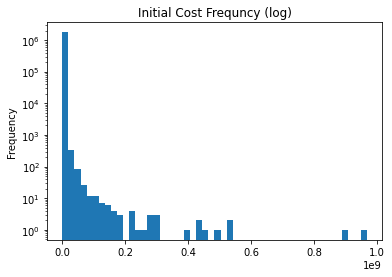

In [106]:
df["Initial Cost"].plot(kind='hist', logy=True, bins=50, title='Initial Cost Frequncy (log)')

#### Fixing Total Estimated Fee

In [107]:
df.loc[df['Total Estimated Fee'] < 0 ]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
76205,302188718,07,BROOKLYN,105,LINCOLN PLACE,00948,00072,3019516,A2,P,...,NaN,NaN,B9,0,40.676403,-73.976292,39,159,Park Slope-Gowanus,3019516


We'll fix this as we did with negative monetary values before

In [108]:
df.loc[df['Total Estimated Fee'] == -85.8,  'Total Estimated Fee'] = 85.8

In [109]:
df['Total Estimated Fee'].max()

31500000.0

Also seems to have real information

In [110]:
df.loc[df['Total Estimated Fee']==31500000.0]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
1404677,322053148,01,BROOKLYN,650,86TH STREET,06056,00015,3153881,NB,P,...,N,NaN,K5,0,40.618851,-74.021875,43,152,Dyker Heights,3153881


## Checking owner's information

In [111]:
show_vals("Owner's Business Name")
show_vals("Owner's House Number")
show_vals("Owner's House Street Name")
show_vals("Owner's House City")
show_vals("Owner's House State")
show_vals("Owner's House Zip")

Top 10 Owner's Business Name:

NaN                                 350600
OWNER                                11053
NY SCHOOL CONSTRUCTION AUTHORITY      9758
NONE                                  9559
NYC SCA                               9228
VORNADO OFFICE MANAGEMENT             6990
NYCHA                                 6652
NYC HOUSING AUTHORITY                 5696
SL GREEN REALTY CORP.                 5696
NEW YORK CITY HOUSING AUTHORITY       4739
Name: Owner's Business Name, dtype: int64

Top 10 Owner's House Number:

NaN      1773829
2             19
30-30         18
555           17
1950          16
22            16
100           16
10            12
32            11
250           11
Name: Owner's House Number, dtype: int64

Top 10 Owner's House Street Name:

NaN                            1773829
555 WEST 23RD STREET                17
22 CHAPEL STREET                    10
1559 49TH STREET                     9
30-30 THOMSON AVENUE                 9
35 N TYSON AVENUE STE#10

## Fixing owner's informations

In [112]:
df.loc[~df["Owner's Business Name"].isna() & df["Owner's Business Name"].str.contains("(?i)new york city")]["Owner's Business Name"].value_counts()

NEW YORK CITY HOUSING AUTHORITY     4739
New York City Housing Authority      388
NEW YORK CITY ECONOMIC DEVELOPME      99
NEW YORK CITY SCHOOL CONSTRUCTIO      82
FIRE DEPARTMENT OF NEW YORK CITY      70
                                    ... 
New York City Dept. of Des & Con       1
NEW YORK CITY HOUSIG AUTHORITY         1
FIRE DEPT. OF NEW YORK CITY            1
BWT, NEW YORK CITY DEP.                1
NEW YORK CITY POICE DEPARTMENT         1
Name: Owner's Business Name, Length: 230, dtype: int64

Normalizes a couple of duplicate names

In [113]:
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace("NEW YORK CITY", "NYC")
df["Owner's Business Name"] = df["Owner's Business Name"].str.upper()
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace(".", '', regex=False)
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace(",", '', regex=False)

All these are the same thing. Uses clusters to fix

In [114]:
#may have to use fuzzy/cluster to fix this problem
df.loc[~df["Owner's Business Name"].isna() & df["Owner's Business Name"].str.contains("(?i)HOUSING AUTHORITY")]["Owner's Business Name"].value_counts()

NYC HOUSING AUTHORITY               11459
NEW YORK CITY HOUSING AUTHORITY       389
NEW YORK HOUSING AUTHORITY            140
NY CITY HOUSING AUTHORITY              66
NYCHA NY HOUSING AUTHORITY             64
NYCHOUSING AUTHORITY                   30
NY HOUSING AUTHORITY                   25
NYC HOUSING AUTHORITY (NYCHA)          23
NYC  HOUSING AUTHORITY                 15
NEW YORK CTY HOUSING AUTHORITY          6
N Y C HOUSING AUTHORITY                 6
NYC HOUSING AUTHORITY- CAD              6
NEW YORK HOUSING AUTHORITY- DESI        4
NEW YORK CITY HHOUSING AUTHORITY        3
NEW CITY HOUSING AUTHORITY              3
NYCITY HOUSING AUTHORITY                3
NEW YORK  CITY HOUSING AUTHORITY        3
NYC HOUSING HOUSING AUTHORITY           3
NEWYORK CITY HOUSING AUTHORITY          3
NEW YOR CITY HOUSING AUTHORITY          2
NYC-HOUSING AUTHORITY                   2
YC HOUSING AUTHORITY                    2
NYC - HOUSING AUTHORITY                 2
MYC HOUSING AUTHORITY             

Used clusters to try to fix the rest of them further below

In [115]:
df["Owner's House State"].value_counts()

NY    981
NJ     11
CT      3
CA      3
KY      1
VA      1
MO      1
MD      1
MA      1
Name: Owner's House State, dtype: int64

Since the states can be outside NYC, these are probably fine

In [116]:
df["Owner's House Zip"].value_counts()

11201    46
10011    31
10022    30
11220    30
11219    27
         ..
11242     1
11581     1
92675     1
11570     1
07960     1
Name: Owner's House Zip, Length: 212, dtype: int64

## Looking at Phone Numbers:

In [117]:
show_vals("Owner's Phone #")

Top 10 Owner's Phone #:

7184728000    12731
NaN           11467
2128947000    10345
2128637625     5610
7183924921     4411
2122161664     4190
2124072400     3922
7184728534     3346
2125295688     3313
5169355555     3288
Name: Owner's Phone #, dtype: int64



A lot of the same phone numbers

In [118]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')

In [119]:
df.loc[df["Owner's Phone #"].str.contains("7184728000")][["Owner's First Name", "Owner's Last Name","Owner's Business Name", "Owner's Phone #"]]

,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's Phone #
6,JOSEPH,SCALISI,SCHOOL CONSTRUCTION AUTHORITY,7184728000
15,JOSEPH,SCALISI,SCHOOL CONSTRUCTION AUTHORITY,7184728000
34,JOSEPH,SCALISI,NYCSCA,7184728000
74,SRIDHAR,DULPETA-RAMA,SCHOOL CONSTRUCTION AUTHORITY,7184728000
129,EFFIE,TSITIRIDIS,SCHOOL CONSTRUCTION AUTHORITY,7184728000
...,...,...,...,...
1770665,MICHAEL,KALEDA,NYCSA,7184728000
1770806,AMY,LINDEN,NYS BOARD OF EDUCATION,7184728000
1770807,AMY,LINDEN,NYS BOARD OF EDUCATION,7184728000
1771871,AMY,LINDEN,NYS BOARD OF EDUCATION,7184728000


All from the same business name so it makes sense

In [120]:
df.loc[df["Owner's Phone #"]=='nan']

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
655,301925442,01,BROOKLYN,975,EAST 55 STREET,07739,00011,3213803,A1,R,...,N,NaN,A9,0,40.633712,-73.923605,46,724,Flatlands,3213803
683,302095104,01,BROOKLYN,66 A,STOCKHOLM STREET,03254,00123,3389150,A1,X,...,N,NaN,B1,0,40.696597,-73.925621,34,421,Bushwick South,3389150
3532,301960947,01,BROOKLYN,4414,10 AVENUE,05607,00041,3136307,A1,R,...,N,NaN,C3,0,40.641681,-73.995968,38,112,Sunset Park East,3136307
5116,200698343,01,BRONX,1200,WATERS PLACE,04226,00070,2087151,A1,R,...,N,NaN,O5,0,40.842733,-73.838373,13,284,Van Nest-Morris Park-Westchester Square,2087151
5174,402163494,01,QUEENS,75-01,162 STREET,06845,00001,4148209,A1,R,...,N,NaN,B3,0,40.726810,-73.806883,24,1241,Pomonok-Flushing Heights-Hillcrest,4148209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774708,302041644,01,BROOKLYN,259,17 STREET,00867,00076,3016463,A2,X,...,N,NaN,C0,0,40.663293,-73.990585,38,143,Park Slope-Gowanus,3016463
1774717,302041733,01,BROOKLYN,123,CALYER STREET,02572,00046,3065081,A2,P,...,N,NaN,C0,0,40.727181,-73.956185,33,561,Greenpoint,3065081
1774742,302041957,01,BROOKLYN,62,MANHATTAN AVENUE,03088,00035,3071408,A2,X,...,N,NaN,S9,0,40.704416,-73.944457,34,491,East Williamsburg,3071408
1774805,302042581,01,BROOKLYN,5516,6 AVENUE,00832,00044,3015040,A2,R,...,N,NaN,C2,0,40.640832,-74.011192,38,100,Sunset Park East,3015040


Nothing wrong with these jobs without an owner's phone number

In [121]:
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains("-")]["Owner's Phone #"].value_counts()

212582-455    3
21255736--    2
212490192-    2
0-            2
71852751-1    2
215-29        1
191-15        1
212863749-    1
2123-51347    1
150-24        1
163-07        1
212269689-    1
212-020844    1
718291550-    1
149-62        1
157-15        1
175-27        1
212808090-    1
71820585-1    1
243-17        1
718767168-    1
71839130-3    1
71845657-6    1
71835636-7    1
718-942300    1
242-01        1
102-18        1
21267955--    1
718888-600    1
718343645-    1
212816-22-    1
71888422--    1
212675200-    1
631-323395    1
146-02        1
Name: Owner's Phone #, dtype: int64

Phone numbers should not contain "-"

In [122]:
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains(" ")]["Owner's Phone #"].value_counts()

212  58664    7
212483 077    6
212 929318    5
718 391110    4
212 996510    4
             ..
908 598100    1
212382 244    1
71 2301100    1
212490 197    1
718334  26    1
Name: Owner's Phone #, Length: 115, dtype: int64

Phone numbers should not contain empty space

### Cleaning phone number

#### removes non-numeric characters

In [123]:

df["Owner's Phone #"] = df["Owner's Phone #"].str.extract('(\d+)', expand=False)
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains(" ")]["Owner's Phone #"].value_counts()

Series([], Name: Owner's Phone #, dtype: int64)

#### Turns phone numbers that start with 0, 1, and does not have 10 digits into nan

In [124]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')
df.loc[~df["Owner's Phone #"].isna() & ((df["Owner's Phone #"].str[0] == "0") | (df["Owner's Phone #"].str[0] == "1") | (df["Owner's Phone #"].apply(len) != 10)), ["Owner's Phone #"]] = np.nan

#### Checks to see if there are any others not of length 10

In [125]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')
df.loc[(df["Owner's Phone #"].apply(len) != 10)]["Owner's Phone #"]

226        nan
637        nan
655        nan
683        nan
2026       nan
          ... 
1774708    nan
1774717    nan
1774742    nan
1774805    nan
1774830    nan
Name: Owner's Phone #, Length: 15487, dtype: object

#### Check for non-numeric charaters

In [126]:
df.loc[(~df["Owner's Phone #"].str.isnumeric()) & (~(df["Owner's Phone #"]=='nan'))]["Owner's Phone #"]

Series([], Name: Owner's Phone #, dtype: object)

### Checking additional numerical columns for coherency

In [127]:
numerical_columns = ['Proposed Zoning Sqft',
       'Enlargement SQ Footage', 'Street Frontage', 'Existing # of Stories',
       'Proposed # of Stories', 'Existing Height', 'Proposed Height',
       'Existing Dwelling Units', 'Proposed Dwelling Units']

Try to convert these all to numeric values

In [128]:
for col in numerical_columns:
    df[col] = df[col].astype('str')

In [129]:
for col in numerical_columns:
    print(col)
    print(df.loc[(~df[col].str.isdigit())
      &(df[col]!='nan')][col])
    print()

Proposed Zoning Sqft
Series([], Name: Proposed Zoning Sqft, dtype: object)

Enlargement SQ Footage
328902    -9
Name: Enlargement SQ Footage, dtype: object

Street Frontage
Series([], Name: Street Frontage, dtype: object)

Existing # of Stories
Series([], Name: Existing # of Stories, dtype: object)

Proposed # of Stories
Series([], Name: Proposed # of Stories, dtype: object)

Existing Height
Series([], Name: Existing Height, dtype: object)

Proposed Height
148037    -12
Name: Proposed Height, dtype: object

Existing Dwelling Units
80582      ....4
471641         .
472307         .
1391712    ....1
Name: Existing Dwelling Units, dtype: object

Proposed Dwelling Units
80582      ....4
413445      NONE
471641         .
472307         .
1580053    ....1
1661037       -0
1744240     NON5
Name: Proposed Dwelling Units, dtype: object



### Fix these issues so we can covnert to numerical values:

We're going to assume like before that these values are unintentially entered as negative when they should be postive

In [130]:
df['Enlargement SQ Footage'] = df['Enlargement SQ Footage'].str.replace('-', '', regex=False)
df['Proposed Height'] = df['Proposed Height'].str.replace('-', '', regex=False)

In [131]:
df['Existing Dwelling Units'] = df['Existing Dwelling Units'].str.replace('.', '', regex=False)
df['Existing Dwelling Units'] = df['Existing Dwelling Units'].str.replace('.', '', regex=False)

In [132]:
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('.', '', regex=False)
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('-', '', regex=False)
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('NONE', '0', regex=False)
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('NON5', '0', regex=False)

##### Try to convert to numerical values now:

In [133]:
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

In [134]:
for col in numerical_columns:
    show_vals(col)

Top 10 Proposed Zoning Sqft:

0       1672969
1          1237
300         914
2000        374
240         340
4000        288
5000        288
3000        281
2400        273
2500        268
Name: Proposed Zoning Sqft, dtype: int64

Top 10 Enlargement SQ Footage:

0       1713488
200         309
300         265
600         262
1000        258
400         237
500         226
800         206
180         184
240         179
Name: Enlargement SQ Footage, dtype: int64

Top 10 Street Frontage:

0      1677513
25       11019
50        9017
40        8948
20        7187
60        4002
100       2866
30        2742
75        2146
80        1659
Name: Street Frontage, dtype: int64

Top 10 Existing # of Stories:

0     821444
2     175744
3     108221
1      99399
6      88726
4      84299
5      76886
12     27759
7      26001
8      16304
Name: Existing # of Stories, dtype: int64

Top 10 Proposed # of Stories:

0     396296
2     273443
3     185384
4     124844
6     120730
1     120561
5     1

Lets replace NaN values with 0 here and convert to ints

In [135]:
df['Existing Dwelling Units'].fillna(0, inplace=True)
df['Proposed Dwelling Units'].fillna(0, inplace=True)

In [136]:
df['Existing Dwelling Units'] = pd.to_numeric(df['Existing Dwelling Units'], errors='coerce', downcast='integer')
df['Proposed Dwelling Units'] = pd.to_numeric(df['Proposed Dwelling Units'], errors='coerce', downcast='integer')

In [137]:
for col in numerical_columns:
    print(col)
    print("Minimum: ", df[col].min())
    print("Maximum: ", df[col].max())
    print()

Proposed Zoning Sqft
Minimum:  0
Maximum:  29214765

Enlargement SQ Footage
Minimum:  0
Maximum:  22304116

Street Frontage
Minimum:  0
Maximum:  98558

Existing # of Stories
Minimum:  0
Maximum:  999

Proposed # of Stories
Minimum:  0
Maximum:  999

Existing Height
Minimum:  0
Maximum:  99999

Proposed Height
Minimum:  0
Maximum:  99999

Existing Dwelling Units
Minimum:  0
Maximum:  52121

Proposed Dwelling Units
Minimum:  0
Maximum:  52121



##### Incorrect numerical values here. The tallest building in NYC in One World Trade Center, with 104 stories, and 1,776 ft. 
 All of these cannot be true:

In [138]:
df.loc[df['Existing # of Stories'] >= 105]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
66767,410138934,01,QUEENS,52-01,GRAND CENTRAL PARKWAY,02018,00001,4458851,A2,X,...,N,NaN,Q1,0,40.745464,-73.847072,21,38302,park-cemetery-etc-Queens,4458851
255824,500317891,01,STATEN ISLAND,77,WILBUR STREET,06668,00085,5082753,DM,X,...,N,NaN,A3,0,40.515355,-74.194042,51,198,Annadale-Huguenot-Prince's Bay-Eltingville,5082753
266632,500518772,01,STATEN ISLAND,128,FRANKLIN AVENUE,00064,00135,5148071,DM,X,...,N,NaN,N2,0,40.642424,-74.091954,49,81,West New Brighton-New Brighton-St. George,5148071
297324,110093906,01,MANHATTAN,216,WEST 18 STREET,00767,00054,1082391,A2,R,...,W,04/10/2017,O6,0,40.741366,-73.998614,3,81,Hudson Yards-Chelsea-Flatiron-Union Square,1082391
297558,110102898,01,MANHATTAN,216,WEST 18 STREET,00767,00054,1082391,A2,X,...,N,NaN,O6,0,40.741366,-73.998614,3,81,Hudson Yards-Chelsea-Flatiron-Union Square,1082391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981254,340357492,01,BROOKLYN,872,3 AVE,00679,00001,3336893,A2,H,...,W,03/01/2016,E1,0,40.657680,-74.004195,38,18,Sunset Park West,3336893
1015038,122809336,01,MANHATTAN,209,WEST 57 STREET,01029,00027,1024903,A2,R,...,N,NaN,D4,0,40.765784,-73.980639,4,137,Midtown-Midtown South,1024903
1108995,140639637,01,MANHATTAN,1185,PARK AVENUE,01522,00001,1048384,A3,X,...,N,NaN,D4,0,40.784817,-73.953800,4,15801,Upper East Side-Carnegie Hill,1048384
1136887,123114646,01,MANHATTAN,424,WEST END AVENUE,01228,00061,1032674,A3,X,...,N,NaN,D8,0,40.785296,-73.980457,6,167,Upper West Side,1032674


In [139]:
df.loc[df['Proposed # of Stories'] >= 105]['Proposed # of Stories']

17247      135
54216      616
61992      212
66767      226
73507      275
          ... 
1745543    660
1749406    212
1753160    118
1753999    212
1754951    212
Name: Proposed # of Stories, Length: 461, dtype: int16

In [140]:
df.loc[df['Existing Height'] > 1776]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
2439,340811508,01,BROOKLYN,922,ST MARKS AVENUE,01230,00009,3031058,A2,D,...,N,NaN,M9,0,40.674730,-73.941468,36,343,Crown Heights North,3031058
13710,110086638,01,MANHATTAN,307,WEST 38 STREET,00762,00025,1013643,A2,J,...,N,NaN,O4,0,40.754946,-73.992175,3,115,Clinton,1013643
39530,321756694,01,BROOKLYN,1,BROOKLYN PLAZA,09999,00001,3856237,A2,X,...,N,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
60341,122576328,01,MANHATTAN,1,CENTRAL PARK WEST,01113,07502,1027191,A2,X,...,N,NaN,R0,0,40.768529,-73.981588,3,145,Lincoln Square,1027191
156387,401537477,01,QUEENS,61-62,56 DRIVE,02711,00075,4432412,DM,X,...,N,NaN,B2,0,40.723596,-73.902894,30,517,Maspeth,4432410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368960,340724880,01,BROOKLYN,346,7TH AVE,01012,00045,3022378,A3,D,...,C,06/08/2020,S5,0,40.666440,-73.981970,39,151,Park Slope-Gowanus,3022378
1368966,340724915,01,BROOKLYN,346,7TH AVE,01012,00045,3022378,A3,D,...,W,04/09/2020,S5,0,40.666440,-73.981970,39,151,Park Slope-Gowanus,3022378
1386207,440620419,01,QUEENS,11171,179TH ST,10297,00048,4219592,A2,X,...,N,NaN,A2,0,40.697401,-73.772773,27,424,St. Albans,4219592
1394409,340777234,01,BROOKLYN,1178,JEFFERSON AVENUE,03389,00014,3077885,A3,D,...,C,01/16/2021,B2,0,40.690347,-73.914182,37,415,Bushwick South,3077885


In [141]:
df.loc[df['Proposed Height'] > 1776]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
2439,340811508,01,BROOKLYN,922,ST MARKS AVENUE,01230,00009,3031058,A2,D,...,N,NaN,M9,0,40.674730,-73.941468,36,343,Crown Heights North,3031058
12914,140928842,01,MANHATTAN,1,BOGUS LANE,00001,00001,1813360,NB,D,...,N,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
13710,110086638,01,MANHATTAN,307,WEST 38 STREET,00762,00025,1013643,A2,J,...,N,NaN,O4,0,40.754946,-73.992175,3,115,Clinton,1013643
39530,321756694,01,BROOKLYN,1,BROOKLYN PLAZA,09999,00001,3856237,A2,X,...,N,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
45104,140940285,01,MANHATTAN,1,BOGUS LANE,00001,00001,1813360,NB,H,...,C,11/15/2020,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731501,301529665,01,BROOKLYN,630,61 STREET,05793,00020,3143844,A1,X,...,N,NaN,C3,0,40.637080,-74.013771,38,118,Sunset Park East,3143844
1751030,301795546,01,BROOKLYN,2402,AVENUE P,06787,00001,3182688,A2,R,...,W,03/23/2012,M9,0,40.611381,-73.949627,48,548,Madison,3182688
1751182,301797214,01,BROOKLYN,275,PARK AVENUE,01874,00001,3054140,A2,X,...,N,NaN,D6,0,40.696012,-73.967562,35,543,park-cemetery-etc-Brooklyn,3054140
1760118,301897482,01,BROOKLYN,315,92 STREET,06086,00082,3154757,NB,Q,...,W,09/28/2006,C2,0,40.619276,-74.032023,43,58,Bay Ridge,3154757


The largest number of units in one building in NYC is < 1400

In [142]:
df.loc[df['Existing Dwelling Units'] >= 1400]['Job Description'][:35]

11206            MODIFICATIONS TO EXISTING SPRINKLER SYSTEM
11281        MECHANICAL AND SPRINKLER WORK FOR RETAIL SHOP.
27594     INSTALLATION OF RRU UNITS  ON THE ROOF. INSTAL...
29371     APPLICATION FILED HEREWITH FOR THE CONSTRUCTIO...
30701     MODIFICATION TO EXISTING SPRINKLER SYSTEM AS P...
32122     ADDITIONS/MODIFICATIONS TO AN EXISTING FIRE AL...
48321     HEREWITH FILE PLANS TO COMBINE APTS. 24K AND 2...
55993     INSTALLATION OF  TEMPORARY PIPE SCAFFOLD AS SH...
67911     INSTALLATION OF DIRECT AIR COOLING UNIT AND EL...
300266    REMOVE EXISTING PLUMBING FIXTURES AND REPLACE ...
302002    INSTALLING TELECOMMUNICATIONS CABINETS MOUNTED...
302732    INSTALLATION OF 330 LINEAR FEET OF HEAVY DUTY ...
302733    INSTALLATION OF 100 LINEAR FEET OF HEAVY DUTY ...
302734    INSTALLATION OF 200 LINEAR FEET OF HEAVY DUTY ...
302853    ADDITIONS TO EXISTING MODIFIED CLASS J FIRE AL...
302857    INSTALLATION OF 335 LINEAR FEET OF HEAVY DUTY ...
302860    INSTALLATION OF 335 LINEAR FEE

#### map these clearly false numerical values to 0

In [143]:
df.loc[df['Existing # of Stories'] >= 105, 'Existing # of Stories'] = 0
df.loc[df['Proposed # of Stories'] >= 105, 'Proposed # of Stories'] = 0
df.loc[df['Existing Height'] >= 1776, 'Existing Height'] = 0
df.loc[df['Proposed Height'] >= 1776, 'Proposed Height'] = 0
df.loc[df['Existing Dwelling Units'] >= 1400, 'Existing Dwelling Units'] = 0
df.loc[df['Proposed Dwelling Units'] >= 1400, 'Existing Dwelling Units'] = 0

## Districts

### Looking at Zoning districts

In [144]:
#Residence (R), Commerical (C), Manufacturing (M)
show_vals("Zoning District 1")
show_vals("Zoning District 2")

Top 10 Zoning District 1:

NaN     334782
R6      149653
R5       84424
C5-3     64134
R3-2     60426
R7-2     59826
R4       56798
R6B      47886
R8       42860
R8B      39377
Name: Zoning District 1, dtype: int64

Top 10 Zoning District 2:

NaN       1581200
R8B         19305
C5-2.5      14916
R6          14544
C5-3        10767
R5           8202
C6-6         7327
R7-2         6440
R8           5550
C6-4.5       5046
Name: Zoning District 2, dtype: int64



Some districts may contain invalid formats

In [145]:
#.4-4 looks weird
df["Zoning District 1"].value_counts(dropna=False)

NaN         334782
R6          149653
R5           84424
C5-3         64134
R3-2         60426
             ...  
R10X             1
R7-A             1
C1               1
C5-3M1D          1
M1-1  OP         1
Name: Zoning District 1, Length: 230, dtype: int64

In [146]:
#Checks for irregular values (values that do not start with (R), (C), (M))
df["Zoning District 1"] = df["Zoning District 1"].astype('str')
df.loc[(df["Zoning District 1"] != "nan") & ~df["Zoning District 1"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH"))]["Zoning District 1"].value_counts()

HAZMAT201    36
HAZMAT200    28
HAZMAT199     3
____R4        1
15            1
.4-4          1
Name: Zoning District 1, dtype: int64

In [147]:
#Checks for irregular values (values that do not start with (R), (C), (M))
df["Zoning District 2"] = df["Zoning District 2"].astype('str')
df.loc[(df["Zoning District 2"] != "nan") & ~df["Zoning District 2"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH"))]["Zoning District 2"].value_counts()

31010    19
90729     7
50623     5
00729     5
11205     4
01013     4
50511     4
70910     3
80917     3
91222     2
31210     2
10509     1
30819     1
80312     1
31030     1
80430     1
10308     1
71219     1
81007     1
30430     1
Name: Zoning District 2, dtype: int64

In [148]:
#turning the values above into np.nan
df.loc[(df["Zoning District 1"] != "nan") & ~df["Zoning District 1"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH")), ["Zoning District 1"]] = np.nan
df.loc[(df["Zoning District 2"] != "nan") & ~df["Zoning District 2"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH")), ["Zoning District 2"]] = np.nan

### Looking at special districts

In [149]:
show_vals("Special District 1")
show_vals("Special District 2")

Top 10 Special District 1:

NaN    1512702
MID      84261
LM       19170
SRD      16574
OP       11192
PI        9937
CL        9898
DB        8219
BR        6876
TMU       6471
Name: Special District 1, dtype: int64

Top 10 Special District 2:

NaN     1694924
POPS      27848
IBZ       23885
MS4       10614
GW         6711
JAM        5924
MIH        2955
HILI       1003
CONH        450
BPRK        389
Name: Special District 2, dtype: int64



In [150]:
#Checks to see if there are lower case values
df.loc[~df["Special District 1"].isna() & df["Special District 1"].str.islower()]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN


### Analysis

Zoning districts had some zones that were invalid such as number only values (ex.31010)  and we changed those values to nan

The typical format for Zoning districts start with C, R, and N. There are also some special districts like PARK and BPC that we also checked

Special Districts didn't have any noticable values that were out of place

## Quick look at GIS

In [151]:
show_vals("GIS_LATITUDE")
show_vals("GIS_LONGITUDE")
show_vals("GIS_COUNCIL_DISTRICT")
show_vals("GIS_CENSUS_TRACT")
show_vals("GIS_NTA_NAME")
show_vals("GIS_BIN")

Top 10 GIS_LATITUDE:

NaN          5656
40.748276    2409
40.751098    2194
40.758754    1542
40.754162    1415
40.703608    1404
40.733848    1297
40.764020    1291
40.711537    1276
40.740704    1198
Name: GIS_LATITUDE, dtype: int64

Top 10 GIS_LONGITUDE:

NaN           5656
-73.984690    2413
-73.992926    2187
-73.978692    1574
-73.976557    1415
-74.009691    1395
-74.015673    1299
-73.973189    1293
-73.871578    1289
-74.001844    1230
Name: GIS_LONGITUDE, dtype: int64

Top 10 GIS_COUNCIL_DISTRICT:

4     236660
3     150042
1     125003
2      72268
33     58657
6      54995
5      42078
39     38469
50     36225
34     35400
Name: GIS_COUNCIL_DISTRICT, dtype: int64

Top 10 GIS_CENSUS_TRACT:

7      16439
102    15630
33     14133
104    13873
92     13757
9      13587
96     13075
94     12487
137    12366
113    12356
Name: GIS_CENSUS_TRACT, dtype: int64

Top 10 GIS_NTA_NAME:

Midtown-Midtown South                         153870
Hudson Yards-Chelsea-Flatiron-Union Square   

In [152]:
#Manually looking at some of these
df[["GIS_LATITUDE", "GIS_LONGITUDE", "GIS_COUNCIL_DISTRICT", "GIS_CENSUS_TRACT", "GIS_NTA_NAME", "GIS_BIN"]]

,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,40.720067,-73.742696,23,542,Queens Village,4226672
1,40.714365,-73.731171,27,568,Queens Village,4231025
2,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
3,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
4,40.839538,-73.923177,16,211,Highbridge,NaN
...,...,...,...,...,...,...
1774828,40.593831,-73.950368,48,592,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3202124
1774829,40.630611,-74.027435,43,66,Bay Ridge,3148750
1774830,40.620486,-73.994067,38,252,Bensonhurst West,3134197
1774831,40.687159,-73.955516,36,233,Bedford,3056361


In [153]:
#shouldn't be 0
df["GIS_LATITUDE"] = df["GIS_LATITUDE"].astype('float')
df["GIS_LATITUDE"].min()

40.498807

In [154]:
df["GIS_LATITUDE"].max()

40.913711

In [155]:
df.loc[df["GIS_LATITUDE"] == 0.0]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN


#### Removed the the rows above because its obviously a filler job

In [156]:
df = df.drop(df[df["GIS_LATITUDE"] == 0.0].index)

In [157]:
df["GIS_LATITUDE"].min()

40.498807

#### The min and max makes sense as the values range from Staten Island to the Bronx

In [158]:
df["GIS_LONGITUDE"] = df["GIS_LONGITUDE"].astype('float')
df["GIS_LONGITUDE"].min()

-74.254897

In [159]:
df["GIS_LONGITUDE"].max()

-73.700376

In [160]:
df.loc[df["GIS_LONGITUDE"] == -73.700376]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
482803,420236097,01,QUEENS,270-03,HILLSIDE AVENUE,08781,00101,4179641,A2,X,...,N,NaN,K4,0,40.739112,-73.700376,23,157901,Glen Oaks-Floral Park-New Hyde Park,4179641


#### These longitudes and latitudes range from Queens to Staten Island which is also consistent with our dataset

In [161]:
df["GIS_COUNCIL_DISTRICT"] = df["GIS_COUNCIL_DISTRICT"].astype('float')
df["GIS_COUNCIL_DISTRICT"].min()

1.0

In [162]:
df["GIS_COUNCIL_DISTRICT"].max()

51.0

#### 1-51 are all valid districts

In [163]:
df["GIS_CENSUS_TRACT"] = df["GIS_CENSUS_TRACT"].astype('float')
df["GIS_CENSUS_TRACT"].min()

1.0

In [164]:
df["GIS_CENSUS_TRACT"].max()

157903.0

In [165]:
df.loc[df["GIS_CENSUS_TRACT"] == 157903]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
88,402661106,01,QUEENS,86-31,256 STREET,08815,00022,4180389,A2,P,...,W,04/30/2021,A5,0,40.732155,-73.710287,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4180389
569,440670891,01,QUEENS,260-05,EAST WILLISTON AVENUE,08790,00067,4179917,A3,J,...,N,NaN,A2,0,40.735538,-73.707479,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4179917
1170,440663480,01,QUEENS,8439,259 STREET,08789,00016,4179857,A2,X,...,N,NaN,A5,0,40.735991,-73.708784,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4179857
1842,440673745,01,QUEENS,8437,259 STREET,08789,00017,4179858,A2,X,...,N,NaN,A5,0,40.736016,-73.708794,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4179858
2940,440672880,01,QUEENS,84-47,266 STREET,08811,00008,4180318,A2,X,...,N,NaN,A1,0,40.737270,-73.702358,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4180318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405269,421785955,01,QUEENS,261-06,EAST WILLISTON AVE,08804,00041,4180164,A3,R,...,N,NaN,O5,0,40.735922,-73.706622,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4180164
1406426,421960863,01,QUEENS,84-40,260 STREET,08789,00055,4179887,A1,P,...,N,NaN,A0,0,40.736250,-73.707927,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4179887
1406546,440665264,01,QUEENS,87-57,257TH ST,08825,00009,4180612,A2,R,...,N,NaN,A1,0,40.729650,-73.708360,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4180612
1407211,440666753,01,QUEENS,259-01,87 AVE,08818,00006,4457139,A3,R,...,N,NaN,B3,0,40.731562,-73.707006,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4457139


#### No irregulars for census tract

In [166]:
df["GIS_BIN"] = df["GIS_BIN"].astype('float')
df["GIS_BIN"].min()

1000000.0

In [167]:
df["GIS_BIN"] = df["GIS_BIN"].astype('float')
df["GIS_BIN"].max()

5799501.0

In [168]:
df.loc[df["GIS_BIN"] == 1000000]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
29,121203722,02,MANHATTAN,96,SOUTH STREET,73,11,1090738,NB,R,...,N,NaN,K2,0,40.706381,-74.002882,1.0,1501.0,Battery Park City-Lower Manhattan,1000000.0
150,121187189,01,MANHATTAN,614,WEST 131ST STREET,01997,00001,1090647,A1,R,...,N,NaN,W6,0,40.817876,-73.957730,7.0,219.0,Manhattanville,1000000.0
220,121204106,01,MANHATTAN,140,WEST 24TH STREET,00799,00063,1090646,NB,R,...,N,NaN,H2,0,40.744080,-73.993558,3.0,91.0,Hudson Yards-Chelsea-Flatiron-Union Square,1000000.0
221,121204106,02,MANHATTAN,140,WEST 24TH STREET,00799,00063,1090646,NB,R,...,N,NaN,H2,0,40.744080,-73.993558,3.0,91.0,Hudson Yards-Chelsea-Flatiron-Union Square,1000000.0
241,123392300,01,MANHATTAN,614,WEST 131ST STREET,01997,00001,1090647,A2,R,...,N,NaN,W6,0,40.817876,-73.957730,7.0,219.0,Manhattanville,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634604,110284139,01,MANHATTAN,130,LIBERTY STREET,00054,00001,1001059,A2,X,...,N,NaN,O2,0,40.710283,-74.012989,1.0,13.0,Battery Park City-Lower Manhattan,1000000.0
1634682,110284889,01,MANHATTAN,10,WEST 48 STREET,01263,07501,1090672,A2,R,...,W,10/09/2019,K2,0,40.757492,-73.978624,4.0,96.0,Midtown-Midtown South,1000000.0
1674120,120448122,01,MANHATTAN,3243,BROADWAY,01997,00030,1090647,A3,R,...,W,03/16/2020,W6,0,40.817011,-73.957344,7.0,219.0,Manhattanville,1000000.0
1679133,120478107,01,MANHATTAN,142,WEST 24TH STREET,00799,00064,1090646,A2,R,...,N,NaN,H2,0,40.744099,-73.993602,3.0,91.0,Hudson Yards-Chelsea-Flatiron-Union Square,1000000.0


In [169]:
df.loc[df["GIS_BIN"] == 5799501]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
262957,500476399,01,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A1,R,...,NaN,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0
262958,500476399,02,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A1,J,...,NaN,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0
262959,500476399,03,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A1,J,...,NaN,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0
262960,500476399,04,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A1,R,...,NaN,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0
264230,500490346,01,STATEN ISLAND,1,RICHMOND TERR,00185,00203,5141706,A2,X,...,N,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0
266145,500513107,01,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A2,X,...,N,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0
267190,500524907,01,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A2,X,...,N,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0
267597,500530124,01,STATEN ISLAND,1,RICHMOND TERR,00185,00203,5141706,A3,X,...,N,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0
267959,500553108,01,STATEN ISLAND,1,RICHMOND TERR,00185,00203,5141706,A2,X,...,N,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0
268010,500553787,01,STATEN ISLAND,1,RICHMOND TERR,00185,00203,5141706,A2,X,...,N,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0


#### Nothing wrong with GIS BIN either

# Data Profilling for datetime columns


Find format problems and outliers in all datetime columns

Using openclean's sklearn modules to detect problems and outliers

In [170]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

def findDateOutliers(column_name, eps_setting = 0.05):
    datetime_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(datetime_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(datetime_data)))
    print(DBSCANOutliers().find(datetime_data))
    print(DBSCANOutliers(eps = eps_setting).find(datetime_data))
    print('\n==================================')

In [171]:
date_cols = []

print("Datetime Data columns:\n")
for col in ds.columns:
    if 'Date' in col or 'DATE' in col:
        print(col)
        date_cols.append(col)

print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.02)

Datetime Data columns:

Latest Action Date
Pre- Filing Date
DOBRunDate
SIGNOFF_DATE
SPECIAL_ACTION_DATE
----------------------------

Column:  Latest Action Date
1.  10/13/2017         793
2.  05/18/2017         775
3.  01/25/2017         744
4.  02/12/2018         739
5.  11/30/2016         734
6.  07/11/2016         716
7.  11/29/2016         700
8.  04/30/2018         699
9.  05/04/2017         686
10. 04/20/2016         674

Total number of distinct values in Latest Action Date is 7373
['06//1403']
['02/05/2020', '2020-02-20 ', '2018-12-10 ', '04/16/2019', '02/02/2000', '02/04/2020', '10/13/2017', '02/02/2020', '06//1403', '2019-05-17 ', '03/26/2019', '07/11/2016', '06/24/2019', '08/30/2016', '03/16/2019', '2019-05-24 ', '11/30/2016', '02/20/2002', '04/25/2016', '05/04/2017', '02/02/2002', '04/30/2018', '11/10/2011', '02/22/2000', '02/22/2020', '05/19/2017', '01/25/2017', '02/20/2020', '05/18/2017', '05/07/2019', '02/22/2002', '09/15/2003', '11/29/2016', '05/09/2017', '06/18/2003',

# Remember that after changing some of the column names, there are some columns that are also datetime data:

"Paid": "Paid Date"\
"Fully Paid": "Fully Paid Date"\
"Assigned": "Assigned Date"\
"Approved": "Approved Date"\
"Pre- Filing Date": "Pre-Filing Date"\
"DOBRunDate": "DOB Run Date"\
"SIGNOFF_DATE": "Signoff Date"\
"SPECIAL_ACTION_DATE": "Special Action Date"\

In [172]:
date_cols = ["Paid","Fully Paid","Assigned","Approved"]

for col in date_cols:
    findDateOutliers(col, 0.02)

Column:  Paid
1.                 9,069
2.  06/28/2019       1,700
3.  12/30/2014       1,484
4.  06/27/2019       1,319
5.  06/26/2008       1,259
6.  02/15/2008         978
7.  02/04/2011         915
8.  06/30/2009         879
9.  06/25/2008         866
10. 09/30/2016         839

Total number of distinct values in Paid is 6642
['']
['', '06/28/2019', '06/26/2008', '12/30/2014', '02/02/2020', '02/04/2011', '09/30/2016', '07/28/1994', '02/02/2002', '02/22/2020', '11/19/1999', '06/27/2019']

Column:  Fully Paid
1.                 6,579
2.  06/28/2019       1,702
3.  12/30/2014       1,515
4.  06/27/2019       1,310
5.  06/26/2008       1,222
6.  02/15/2008         978
7.  02/04/2011         916
8.  06/30/2009         857
9.  09/30/2016         844
10. 12/29/2014         795

Total number of distinct values in Fully Paid is 6709
['']
['', '06/28/2019', '06/26/2008', '12/30/2014', '02/02/2020', '02/04/2011', '09/30/2016', '02/02/2002', '02/22/2020', '11/19/1999', '06/27/2019']

Column:  A

# Analysis

the above results show the problems for the data cleaning task:
    
### Latest Action Date
outliers: '06//1403'
format: 'yyyy-mm-dd' and 'mm/dd/yyyy'

### Pre- Filing Date
no problem found

### DOBRunDate
format: 'yyyy-mm-dd' and 'mm/dd/yyyy 00:00:00'

### SIGNOFF_DATE
outliers: empty value

### SPECIAL_ACTION_DATE
outliers: empty value and '11//2006'

### Paid
outliers: empty value

### Fully Paid
outliers: empty value

### Assigned
outliers: empty value

### Approved
outliers: empty value

# Data Cleaning for outliers in datetime columns

In [70]:
# new_df = df

# Reload the data, only for test
# new_df = pd.read_csv(datafile, dtype='object', sep='\t')

In [188]:
df['Latest Action Date'] = df['Latest Action Date'].replace('06//1403', None)

In [189]:
df['SIGNOFF_DATE'] = df['SIGNOFF_DATE'].replace('', None)

In [190]:
df['SPECIAL_ACTION_DATE'] = df['SPECIAL_ACTION_DATE'].replace('11//2006', None)
df['SPECIAL_ACTION_DATE'] = df['SPECIAL_ACTION_DATE'].replace('', None)

## Fixing Datetime columns format

In [191]:
datetime_column_list = ['Latest Action Date', 'DOB Run Date', 'SPECIAL_ACTION_DATE', 'SIGNOFF_DATE', 
                        'Pre-Filing Date', 'Paid Date', 'Fully Paid Date', 'Assigned Date', 'Fully Permitted', 'Approved Date']
for col in datetime_column_list:
    show_vals(col)

Top 10 Latest Action Date:

10/13/2017    793
05/18/2017    775
01/25/2017    744
02/12/2018    739
11/30/2016    734
07/11/2016    716
11/29/2016    700
04/30/2018    699
05/04/2017    686
04/20/2016    674
Name: Latest Action Date, dtype: int64

Top 10 DOB Run Date:

04/28/2021 00:00:00    1676399
07/09/2021 00:00:00      17146
09/16/2021 00:00:00       6883
08/02/2021 00:00:00       2656
11/03/2021 00:00:00       1709
11/09/2021 00:00:00       1361
05/25/2021 00:00:00       1254
07/24/2021 00:00:00       1206
08/31/2021 00:00:00       1143
10/05/2021 00:00:00       1116
Name: DOB Run Date, dtype: int64

Top 10 SPECIAL_ACTION_DATE:

NaN           1602654
10/24/2012       5513
05/12/2017        510
10/23/2012        229
02/10/2017        224
08/13/2019        188
03/02/2015        186
06/27/2017        181
03/02/2017        172
11/10/2015        156
Name: SPECIAL_ACTION_DATE, dtype: int64

Top 10 SIGNOFF_DATE:

NaN           711590
02/12/2018       603
01/25/2017       593
05/18/2017 

Check to see if any columns have values in year-month-day format

In [194]:
for col in datetime_column_list:
    print(col, '\n', df.loc[df[col].str.contains('-', regex=False, na=False)][col], '\n\n')

Latest Action Date 
 51478    2005-11-01 
52605    2000-10-17 
55800    2016-07-05 
55933    2018-08-24 
55941    2018-08-24 
            ...     
80414    2003-03-11 
80415    2002-12-19 
80416    2004-10-25 
80417    2004-01-22 
80418    2004-06-22 
Name: Latest Action Date, Length: 967, dtype: object 


DOB Run Date 
 51478    2018-11-02 
52605    2018-11-02 
55800    2018-03-01 
55933    2018-08-25 
55941    2018-08-25 
            ...     
80414    2018-11-02 
80415    2018-11-02 
80416    2018-11-02 
80417    2018-11-02 
80418    2018-11-02 
Name: DOB Run Date, Length: 967, dtype: object 


SPECIAL_ACTION_DATE 
 Series([], Name: SPECIAL_ACTION_DATE, dtype: object) 


SIGNOFF_DATE 
 Series([], Name: SIGNOFF_DATE, dtype: object) 


Pre-Filing Date 
 Series([], Name: Pre-Filing Date, dtype: object) 


Paid Date 
 Series([], Name: Paid Date, dtype: object) 


Fully Paid Date 
 Series([], Name: Fully Paid Date, dtype: object) 


Assigned Date 
 Series([], Name: Assigned Date, dtype: o

#### Fix DOB Run Date formatting issues
DOB Run Date and Latest Action date both have values in multiple datetime formats

We want all the dates to be in a standard year-month-day datetime format, so we'll seperately convert the values not in this format, and in this format to datetime objects


In [195]:
df.loc[~df['DOB Run Date'].str.contains('-', regex=False), 'DOB Run Date'] = pd.to_datetime(
    df.loc[~df['DOB Run Date'].str.contains('-', regex=False)]['DOB Run Date'], infer_datetime_format=True, errors='coerce')

This mapped most of our values to datetimes, now just need to map the rest

In [197]:
df.loc[:,'DOB Run Date'] = pd.to_datetime(
    df['DOB Run Date'], infer_datetime_format=True, errors='coerce')

In [198]:
df['DOB Run Date']

0         2021-05-06
1         2021-05-22
2         2021-06-25
3         2021-06-25
4         2021-11-11
             ...    
1774828   2021-04-28
1774829   2021-04-28
1774830   2021-04-28
1774831   2021-04-28
1774832   2021-04-28
Name: DOB Run Date, Length: 1774833, dtype: datetime64[ns]

In [199]:
df['DOB Run Date'].value_counts()

2021-04-28    1676399
2021-07-09      17146
2021-09-16       6883
2021-08-02       2656
2021-11-03       1709
               ...   
2019-12-21          1
2019-01-29          1
2019-05-02          1
2019-04-18          1
2019-07-11          1
Name: DOB Run Date, Length: 297, dtype: int64

#### Fix Latest Action Date formatting issues

We'll use the same method as above

In [200]:
df.loc[~df['Latest Action Date'].str.contains('-', regex=False), 'Latest Action Date'] = pd.to_datetime(
    df.loc[~df['Latest Action Date'].str.contains('-', regex=False)]['Latest Action Date'], infer_datetime_format=True, errors='coerce')

In [202]:
df.loc[:,'Latest Action Date'] = pd.to_datetime(
    df['Latest Action Date'], infer_datetime_format=True, errors='coerce')

In [203]:
df['Latest Action Date']

0         2021-05-05
1         2021-05-21
2         2021-06-24
3         2021-06-24
4         2021-11-10
             ...    
1774828   2006-02-06
1774829   2007-06-20
1774830   2006-03-14
1774831   2010-06-10
1774832   2007-03-23
Name: Latest Action Date, Length: 1774833, dtype: datetime64[ns]

In [204]:
df['Latest Action Date'].value_counts()

2017-10-13    793
2017-05-18    775
2017-01-25    744
2018-02-12    740
2016-11-30    735
             ... 
2004-03-27      1
2003-02-01      1
2012-09-15      1
2009-08-01      1
1997-11-20      1
Name: Latest Action Date, Length: 6997, dtype: int64

#### Fix the remaining Datetime columns

In [205]:
for col in datetime_column_list:
    if (col == 'Latest Action Date') or (col == 'DOB Run Date'):
        continue
    else:
        df.loc[:,col] = pd.to_datetime(df[col], infer_datetime_format=True, errors='coerce')

In [206]:
df['SPECIAL_ACTION_DATE'].value_counts(dropna=False)

NaT           1602655
2012-10-24       5513
2017-05-12        510
2012-10-23        229
2017-02-10        224
               ...   
2008-05-18          1
2001-04-06          1
2021-05-15          1
2003-10-01          1
2000-04-10          1
Name: SPECIAL_ACTION_DATE, Length: 6373, dtype: int64

These should all be proper datetime64[ns] columns now:

In [207]:
df.select_dtypes(include='datetime')

,Latest Action Date,Pre-Filing Date,Paid Date,Fully Paid Date,Assigned Date,Approved Date,Fully Permitted,DOB Run Date,SIGNOFF_DATE,SPECIAL_ACTION_DATE
0,2021-05-05,2021-04-28,2021-04-28,2021-04-28,2021-04-28,2021-04-28,2021-05-05,2021-05-06,NaT,NaT
1,2021-05-21,2021-04-28,2021-04-28,2021-05-04,2021-04-28,2021-05-04,2021-05-21,2021-05-22,NaT,NaT
2,2021-06-24,2021-04-28,2021-04-28,2021-04-28,NaT,NaT,NaT,2021-06-25,NaT,NaT
3,2021-06-24,2021-04-28,2021-04-28,2021-04-28,NaT,NaT,NaT,2021-06-25,NaT,NaT
4,2021-11-10,2021-04-28,2021-04-28,2021-04-28,NaT,NaT,NaT,2021-11-11,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
1774828,2006-02-06,2005-11-14,2005-11-14,2005-11-15,2005-11-17,2005-11-22,2005-12-01,2021-04-28,2006-02-06,NaT
1774829,2007-06-20,2005-11-14,2005-11-14,2005-11-14,NaT,2005-11-14,2006-01-19,2021-04-28,NaT,NaT
1774830,2006-03-14,2005-11-14,2005-11-14,2005-11-14,NaT,2005-11-14,2005-12-05,2021-04-28,2006-03-14,NaT
1774831,2010-06-10,2005-11-14,2005-11-14,2005-11-14,NaT,2005-11-14,NaT,2021-04-28,NaT,NaT


In [208]:
for col in datetime_column_list:
    show_vals(col)

Top 10 Latest Action Date:

10/13/2017    793
05/18/2017    775
01/25/2017    744
02/12/2018    739
11/30/2016    734
07/11/2016    716
11/29/2016    700
04/30/2018    699
05/04/2017    686
04/20/2016    674
Name: Latest Action Date, dtype: int64

Top 10 DOB Run Date:

04/28/2021 00:00:00    1676399
07/09/2021 00:00:00      17146
09/16/2021 00:00:00       6883
08/02/2021 00:00:00       2656
11/03/2021 00:00:00       1709
11/09/2021 00:00:00       1361
05/25/2021 00:00:00       1254
07/24/2021 00:00:00       1206
08/31/2021 00:00:00       1143
10/05/2021 00:00:00       1116
Name: DOB Run Date, dtype: int64

Top 10 SPECIAL_ACTION_DATE:

NaN           1602654
10/24/2012       5513
05/12/2017        510
10/23/2012        229
02/10/2017        224
08/13/2019        188
03/02/2015        186
06/27/2017        181
03/02/2017        172
11/10/2015        156
Name: SPECIAL_ACTION_DATE, dtype: int64

Top 10 SIGNOFF_DATE:

NaN           711590
02/12/2018       603
01/25/2017       593
05/18/2017 

### Check the coherence of datetime values

These don't make sense, but it's not entirely clear if they should be swapped, or removed or what

In [209]:
df.loc[(df['Paid Date'] > df['Fully Paid Date'])
      &(~df['Paid Date'].isna() & ~df['Fully Paid Date'].isna())][['Paid Date', 'Fully Paid Date']]

,Paid Date,Fully Paid Date
32658,2017-08-22,2017-07-14
32751,2017-08-22,2017-07-14
51438,2012-05-15,2012-05-10
54805,2003-10-22,2003-10-21
70746,2008-02-12,2007-04-10
...,...,...
1741115,2003-10-22,2003-10-21
1741116,2003-10-22,2003-10-21
1741118,2003-10-22,2003-10-21
1747698,2004-12-02,2004-05-26


Again here it's not clear how a job could be approved before being assigned, or how a job could have it's latest action date  before the Pre-filing date 

In [210]:
df.loc[(df['Assigned Date'] > df['Approved Date'])
      &(~df['Assigned Date'].isna() & ~df['Approved Date'].isna())][['Assigned Date', 'Approved Date']]

,Assigned Date,Approved Date
87,2009-04-10,2008-08-19
90,2021-04-29,2001-07-26
95,2010-06-01,2008-11-22
99,2017-05-16,2010-09-13
102,2021-01-12,2010-04-09
...,...,...
1774715,2007-12-12,2006-05-22
1774722,2017-04-10,2006-03-28
1774740,2007-09-06,2006-02-24
1774784,2020-04-23,2006-08-04


In [211]:
df.loc[(df['Pre-Filing Date'] > df['Latest Action Date'])
      &(~df['Pre-Filing Date'].isna() & ~df['Latest Action Date'].isna())][['Pre-Filing Date', 'Latest Action Date']]

,Pre-Filing Date,Latest Action Date
161363,2003-03-05,2003-01-14
1448881,2002-06-17,2002-06-14


##### These are, however a small percentage of of our total jobs

Fraction of jobs Assigned after they were already approved out of total jobs

In [212]:
df.loc[df['Assigned Date'] > df['Approved Date']]['Assigned Date'].count()/df['Assigned Date'].count()

0.043688739888762804

Fraction of jobs with Paid Dates after they were already Fully Paid out of total jobs

In [213]:
df.loc[df['Paid Date'] > df['Fully Paid Date']]['Paid Date'].count()/df['Paid Date'].count()

9.910724196438482e-05

Fraction of jobs with latest action date before the prefiling date out of total jobs

In [214]:
df.loc[df['Pre-Filing Date'] > df['Latest Action Date']]['Pre-Filing Date'].count()/df['Pre-Filing Date'].count()

1.126866584067346e-06

# Data Profilling for City and Other Description

Find format problems and outliers in City and Description columns

Using openclean's sklearn modules to detect problems and outliers

In [215]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [216]:
date_cols = ["City ", "Other Description"]

In [217]:
date_cols = ["City ", "Other Description"]
print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.1)

----------------------------

Column:  City 
1.             1,773,830
2.  BROOKLYN         309
3.  NEW YORK         273
4.    QUEENS          56
5.        NY          37
6.     BRONX          32
7.  STATEN ISLAND          19
8.       LIC          18
9.  New York          18
10. FLUSHING          15

Total number of distinct values in City  is 115
['', 'NEW HYDE PARK', 'FORT LEE', 'WILLIAMSBURG', 'New York City', 'E. ELMHURST', 'MANHATTAN', 'NEW YORK', 'ST. ALBANS', 'NEW YORK CITY', 'New York', "B'KLYN", 'L.I.C.', 'REGO PK', 'HILLSBOROUGH', 'REGO PARK', 'N.Y.']

Column:  Other Description
1.               734,887
2.  GEN. CONSTR.     316,603
3.        GC     116,243
4.  GEN. CONSTR      87,351
5.  STRUCTURAL      55,576
6.       BPP      50,685
7.  GEN CONST      42,153
8.  SOLAR TAX      33,561
9.  GEN.CONSTRUCTN.      26,544
10.   FACADE      22,633

Total number of distinct values in Other Description is 16629
['', 'G.C..', 'VIO 34307871N', 'FACADE LL11/98', 'C. OF 0.', 'NB/G.C.', 'L

# Analysis

the above results show the problems for the data cleaning task:
    
### For City

There are many misspellings and abbreviations for city names. We can use both clustering and Soundex to detect misspellings and abbreviations. And we can check if our cleaning is right by refer to the U.S. Cities reference datasets in openclean.


### For Other Description

Other Description can be anything, so we just care about empty value and values that are too similar and are showing exactly same things (for example 'GC' and '___GC')

In [5]:
from openclean.function.eval.base import Col, Eval
from openclean.function.eval.logic import And
from openclean.function.value.phonetic import Soundex, soundex

In [6]:
upper = ds\
    .select('City ')\
    .update('City ', str.upper)

In [7]:
from openclean.data.refdata import RefStore

refdata = RefStore()
city_df = refdata\
    .load('encyclopaedia_britannica:us_cities', auto_download=True)\
    .df()


In [8]:
city_list = city_df['city']
print(city_list)

0          Demopolis
1          Sylacauga
2               Troy
3             Dothan
4           Prichard
            ...     
1956          Powell
1957        Riverton
1958        Sheridan
1959    Rock Springs
1960         Buffalo
Name: city, Length: 1961, dtype: object


# An example of using soundex in openclean

However, using soundex for each of the city is too slow, the code below take nearly 4 mins for one sningle city.\
So we should use clustering first and then use hard code to clean the remianing city name that is not in the city_list.

In [38]:
brooklyn = ds\
    .select('City ')\
    .update('City ', str.upper)\
    .filter(And(Eval('City ', Soundex()) == soundex('BROOKLYN'), Col('City ') != 'BROOKLYN'))\
    .distinct()

print('RANK\tCOUNT\tNAME')
for i, entry in enumerate(brooklyn.most_common()):
    key, count = entry
    print('{}.\t{}\t{}'.format(i + 1, count, key))

RANK	COUNT	NAME
1.	2	BROKKLYN
2.	1	BRKLYN


# Data Cleaning for Applicant columns

* how to deal with empty values has not decided yet

# Transform all city names to upper case

### Remember that we have changed some column names:
"City ": "Owner's House City"\
"State": "Owner's House State"

In [9]:
df['Owner\'s House City'] = df['Owner\'s House City'].str.upper()

# Convert similar values to suggested value using kNN clustering

In [11]:
# Cluster string using kNN clusterer (with the default n-gram setting)
# using the Levenshtein distance as the similarity measure.

from openclean.cluster.knn import knn_clusters
from openclean.function.similarity.base import SimilarityConstraint
from openclean.function.similarity.text import LevenshteinDistance
from openclean.function.value.threshold import GreaterThan

def getClusters(col, minsize = 2, preds = 0.5):
    dba = ds.select(col).distinct()
    clusters = knn_clusters(
        values=dba,
        sim=SimilarityConstraint(func=LevenshteinDistance(), pred=GreaterThan(preds)),
        minsize=minsize
    )
    return clusters

def print_cluster(cnumber, cluster):
    item_count = 0
    print('Cluster {} (of size {})\n'.format(cnumber, len(cluster)))
    for val, count in cluster.items():
        item_count += 1
        if item_count <= 10:
            print('{} ({})'.format(val, count))
    if item_count>10:
        print(".......{} more items".format(item_count-10))
    print('\nSuggested value: {}\n\n'.format(cluster.suggestion()))

def updateUsingClusters(col, clusters, isPrint = False):
    
    orignal_list = []
    suggestion_list = []
    clusters.sort(key=lambda c: len(c), reverse=True)
       
    for i, cluster in enumerate(clusters):        
        suggestion = cluster.suggestion()
        orignal_list = []
        suggestion_list = []
        if isPrint and i <5:
            print_cluster(i, cluster)
        
        for val, count in cluster.items(): 
            orignal_list.append(val)
            suggestion_list.append(suggestion)
    
    df[col] = df[col].replace(orignal_list, suggestion_list)

In [12]:
date_cols = ['Owner\'s House City','Other Description' ]


print("kNN cluster for ", 'Owner\'s House City')
col_clusters = getClusters("City ")
print("updating column ", 'Owner\'s House City')
print("----------------------\nTop 5 Cluster:\n----------------------")
updateUsingClusters('Owner\'s House City', col_clusters, True)
print("================")

print("kNN cluster for ", date_cols[1])
col_clusters = getClusters(date_cols[1])
print("updating column ", date_cols[1])
print("----------------------\nTop 5 Cluster:\n----------------------")
updateUsingClusters(date_cols[1], col_clusters, True)
print("================")

kNN cluster for  Owner's House City
updating column  Owner's House City
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 2)

NEW YORK CITY (2)
NEW YORK (273)

Suggested value: NEW YORK


Cluster 1 (of size 2)

ROOKLYN (1)
BROOKLYN (309)

Suggested value: BROOKLYN


Cluster 2 (of size 2)

MANHATTAN (8)
MAHATTAN (2)

Suggested value: MANHATTAN


Cluster 3 (of size 2)

OZONE PARK (1)
SOUTH OZONE PAR (2)

Suggested value: SOUTH OZONE PAR


Cluster 4 (of size 2)

JACKSON HEIGHTS (1)
ROSLYN HEIGHTS (1)

Suggested value: JACKSON HEIGHTS


kNN cluster for  Other Description
updating column  Other Description
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 773)

GEN. CONSTR. (316603)
GENERAL CONSTR (283)
GEN CONST (42153)
GEN. CONSTR (87351)
GEN CONST/STRUC (63)
GN CONSTRUCTION (1)
GEN CONSTRUCT (3644)
GEN CONST. (4806)
GEN. CONST. (10444)
GENERAL CONSTRU (2192)
.......763 more items

Suggested value: GEN. CONSTR.


Cluster 1 (of si

# After clustering, find data that is not in the reference city dataset, hard code to clean them

In [227]:
upper_city_list = []
for item in city_list:
    upper_city_list.append(str(item.upper()))

outlier_cities = df.loc[(~df['Owner\'s House City'].str.upper().isin(upper_city_list)) & (~df['Owner\'s House City'].isna())]['Owner\'s House City'].drop_duplicates()
print(outlier_cities)

2348          NEW YORK
10332            BKLYN
10466          ROOKLYN
31713    RICHMOND HILL
38548               BX
             ...      
76789         TUCKAHOE
77178          SEAFORD
78833           L.I.C.
80175          REGO PK
80367           B'KLYN
Name: Owner's House City, Length: 74, dtype: object


# Print standardized cities and found outliers

In [228]:
standardized_cities = df.loc[(df['Owner\'s House City'].str.upper().isin(upper_city_list)) & (~df['Owner\'s House City'].isna())]['Owner\'s House City'].drop_duplicates()
print(standardized_cities)

4040            BROOKLYN
52605              BRONX
69921      STATEN ISLAND
73527             QUEENS
73910            ASTORIA
74098             ALBANY
74206            HOBOKEN
74402       NEW ROCHELLE
74427    PORT WASHINGTON
74632           FLUSHING
74784       FOREST HILLS
74853          MANHATTAN
76042          HEMPSTEAD
76043        LOS ANGELES
76087       HILLSBOROUGH
76105             BOSTON
76107         GREAT NECK
76171          RIDGEWOOD
76187        GARDEN CITY
76219       WILLIAMSBURG
76295             CORONA
76300      NEW YORK CITY
76332          RIVERSIDE
76496           ELMHURST
76499         MORRISTOWN
76601           FORT LEE
76647          TARRYTOWN
76661           LAKEWOOD
76688         LOUISVILLE
76728            ROANOKE
76757            YONKERS
76771       WHITE PLAINS
76773         HUNTINGTON
76967        KANSAS CITY
Name: Owner's House City, dtype: object


In [229]:
outlier_city_list = []
for item in outlier_cities:
    outlier_city_list.append(str(item))
    
print(outlier_city_list)

['NEW YORK', 'BKLYN', 'ROOKLYN', 'RICHMOND HILL', 'BX', 'NY', 'OLD WESTBURY', 'N.Y.', 'HOLLIS', 'MAHATTAN', 'LAKE SUCCESS', 'BROKKLYN', 'BETHESDA', 'JAMAICA', 'SECAUCUS', 'LIC', 'MASPETH', 'JAMAICA ESTATES', 'SOUTH OZONE PAR', 'BAYSIDE', 'JAM', 'PARMUS', 'KEW GARDENS', 'WOONSECKET', 'LI', 'ST. ALBANS', 'MASSAPEQUA', 'SI', 'FLORAL PARK', 'ROSLYN HEIGHTS', 'HOWARD BEACH', 'WHITEPLAINS', 'JACKSON HEIGHTS', 'REGO PARK', 'NEW HYDE PARK', 'REGO', 'ARVERNE', 'OZONE PARK', 'VALLEY STREAM', 'NEPONSIT', 'ROCKVILLE CENTR', 'BRIARWOOD', 'BRKLYN', 'MOUNT LAUREL', 'QUEEEN', 'ELMSFORD', 'NYC', 'GILLFORD', 'PARSIPPANY', 'WOODSIDE', 'LONG ISLAND CIT', 'QUEEN', 'VAALLEY STREAAM', 'BRONS', 'COLLEGE POINT', 'ROCKAWAY POINT', 'DOUGLASTON', 'ENGLEWOOD CLIFF', 'QNS', 'LYNBROOK', 'SYOSSET', 'FRESH MEADOWS', 'LITTLE NECK', 'WOODHAVEN', 'HARTSDALE', 'ATLANTIC BEACH', 'SAN JUAN CAPIST', 'CALDE PLACE', 'RIVERDALE', 'TUCKAHOE', 'SEAFORD', 'L.I.C.', 'REGO PK', "B'KLYN"]


# Search for similar city names in reference city dataset, and hard code to replace those outliers

In [230]:
def findCityName(str):
    print(city_df['city'].loc[city_df['city'].str.contains(str)].drop_duplicates())
    print("------------------------\n")
    
findCityName("Rich")
findCityName("Island")
findCityName("White")
findCityName("Philadelphia")
findCityName("Morris")
findCityName("Nassau")
findCityName("Westchester")
  

137       Richmond
1728    Richardson
1860      Richland
Name: city, dtype: object
------------------------

498       Rock Island
1060     Grand Island
1286    Staten Island
1294     Coney Island
Name: city, dtype: object
------------------------

363             White Springs
1266             White Plains
1881    White Sulphur Springs
Name: city, dtype: object
------------------------

997         Philadelphia
1418    New Philadelphia
Name: city, dtype: object
------------------------

1151    Morristown
Name: city, dtype: object
------------------------

Series([], Name: city, dtype: object)
------------------------

Series([], Name: city, dtype: object)
------------------------



In [234]:
outlier_city_list = ['NEW YORK', 'BKLYN', 'ROOKLYN', 'RICHMOND HILL', 'BX', 'NY', 'OLD WESTBURY', 'N.Y.', 'HOLLIS', 'MAHATTAN', 'LAKE SUCCESS', 'BROKKLYN', 'BETHESDA', 'JAMAICA', 'SECAUCUS', 'LIC', 'MASPETH', 'JAMAICA ESTATES', 'SOUTH OZONE PAR', 'BAYSIDE', 'JAM', 'PARMUS', 'KEW GARDENS', 'WOONSECKET', 'LI', 'ST. ALBANS', 'MASSAPEQUA', 'SI', 'FLORAL PARK', 'ROSLYN HEIGHTS', 'HOWARD BEACH', 'WHITEPLAINS', 'JACKSON HEIGHTS', 'REGO PARK', 'NEW HYDE PARK', 'REGO', 'ARVERNE', 'OZONE PARK', 'VALLEY STREAM', 'NEPONSIT', 'ROCKVILLE CENTR', 'BRIARWOOD', 'BRKLYN', 'MOUNT LAUREL', 'QUEEEN', 'ELMSFORD', 'NYC', 'GILLFORD', 'PARSIPPANY', 'WOODSIDE', 'LONG ISLAND CIT', 'QUEEN', 'VAALLEY STREAAM', 'BRONS', 'COLLEGE POINT', 'ROCKAWAY POINT', 'DOUGLASTON', 'ENGLEWOOD CLIFF', 'QNS', 'LYNBROOK', 'SYOSSET', 'FRESH MEADOWS', 'LITTLE NECK', 'WOODHAVEN', 'HARTSDALE', 'ATLANTIC BEACH', 'SAN JUAN CAPIST', 'CALDE PLACE', 'RIVERDALE', 'TUCKAHOE', 'SEAFORD', 'L.I.C.', 'REGO PK', "B'KLYN"]
clean_city_list = ['NEW YORK CITY', 'BROOKLYN', 'BROOKLYN', 'RICHMOND', 'BRONX', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'MANHATTAN', 'NEW YORK CITY', 'BROOKLYN', 'BETHESDA', 'NEW YORK CITY', 'SECAUCUS', 'LONG ISLAND CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'PARAMUS', 'NEW YORK CITY', 'WOONSOCKET', 'LONG ISLAND CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'STATEN ISLAND', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'WHITE PLAINS', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'BROOKLYN', 'PHILADELPHIA', 'QUEEENS', 'NEW YORK CITY', 'NEW YORK CITY', 'GILLFORD', 'MORRIS', 'NEW YORK CITY', 'LONG ISLAND CITY', 'QUEENS', 'BRONX', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'QUEENS', 'NEW YORK CITY', 'NASSAU', 'QUEENS', 'QUEENS', 'WOODHAVEN', 'NEW YORK CITY', 'NASSAU', 'SAN JUAN CAPISTRANO', 'BROOKLYN', 'RIVERDALE', 'STATEN ISLAND', 'NASSAU', 'LONG ISLAND CITY', 'QUEENS', "BROOKLYN"]

df['Owner\'s House City'] = df['Owner\'s House City'].replace(outlier_city_list, clean_city_list)

# Check State Column

In [236]:
state_col = 'State'
findDateOutliers(state_col, 0.1)

Column:  State
1.             1,773,830
2.        NY         981
3.        NJ          11
4.        CA           3
5.        CT           3
6.        MD           1
7.        MA           1
8.        KY           1
9.        VA           1
10.       MO           1

Total number of distinct values in State is 10
['']



In [237]:
ds.select('State').distinct()

Counter({'': 1773830,
         'NY': 981,
         'MD': 1,
         'NJ': 11,
         'CA': 3,
         'MA': 1,
         'CT': 3,
         'KY': 1,
         'VA': 1,
         'MO': 1})

# Find functional dependencies violations on City -> State

In [242]:
from openclean.operator.collector.count import distinct
from openclean.operator.map.violations import fd_violations

groups = fd_violations(df, lhs='Owner\'s House City', rhs='Owner\'s House State')

print('City         \t|            State')
print('=============\t|  ===============')
for key in groups:
    conflicts = distinct(groups.get(key), 'Owner\'s House State').most_common()
    state, count = conflicts[0]
    print('{:<12} \t| {} x {}'.format(key, count, state))
    for state, count in conflicts[1:]:
        print('             \t| {} x {}'.format(count, state))
    print('-------------\t|  ---------------')

City         	|            State
=============	|  ===============
NEW YORK CITY 	| 421 x NY
             	| 1 x NJ
-------------	|  ---------------


There is a row that has "NEW YORK CITY" as city, but have "NJ" as State, fix its state to "NY"

In [243]:
index = df['Owner\'s House State'].loc[(df['Owner\'s House City'] == "NEW YORK CITY") & (df['Owner\'s House State'] == "NJ")].index[0]
df['Owner\'s House State'].update(pd.Series(['NY'], index = [index]))

In [245]:
df['Owner\'s House State'].loc[(df['Owner\'s House City'] == "NEW YORK CITY") & (df['Owner\'s House State'] == "NJ")]

Series([], Name: Owner's House State, dtype: object)

# Apply similar operation on Owner's Business Name

In [246]:
bn_col = "Owner's Business Name"
findDateOutliers(bn_col)

Column:  Owner's Business Name
1.       N/A     260,197
2.                44,184
3.        NA      42,506
4.     OWNER      11,053
5.  NY SCHOOL CONSTRUCTION AUTHORITY       9,758
6.      NONE       9,559
7.   NYC SCA       9,228
8.  VORNADO OFFICE MANAGEMENT       6,990
9.     NYCHA       6,652
10. SL GREEN REALTY CORP.       5,696

Total number of distinct values in Owner's Business Name is 412716
['', '1ONEDOUBLENINEDASHING, LLC', 'C & R CORP.', 'E.D.G.A.S. CORP.', '830 W. 177 ST. LLC', 'C & M LLC', 'M & E 336-348  E 18TH ST LLC', '66 E 7TH ST, LLC', 'VI VI', '8-11 & 13 43RD ROAD', '15 CLIFF II, LLC', '769 9th. Ave. L.L.C.', 'RS JZ BEDFORD- N 6TH, LLC', '100 W. 119 ST. CORP.', 'C6829 APARTMENTS,LLCMEMBER', 'RU YI 888 INC', 'M K R F, LLC', 'G & S REALTY I, LLC', '421 W. 21ST, LLC.', '522-534 REALTY L.L.C.', 'Park & 71st Corp.  c/o BHS', 'R.A.L.REALTY', 'KINGS 29, L.L.C.', 'DDEH 233 E 111 LLC', 'D. D. C.', '55 V.  Corp', '76-01 37 AVE, CORP', '6TH AVE  CAFE  INC', 'K & C  LLC', 'ESRT 

# Using clustering for Business Name takes too much time, we can only clean those empty data for now 

In [247]:
df[bn_col] = df[bn_col].replace(['N/A', '', 'NA','NONE'], [None,None,None,None])

# Data Profilling for applicant columns

Find format problems and outliers in all applicant columns

Using openclean's sklearn modules to detect problems and outliers

In [248]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [249]:
date_cols = []

print("Applicant Data columns:\n")
for col in ds.columns:
    if 'Applicant' in col:
        print(col)
        date_cols.append(col)

Applicant Data columns:

Applicant's First Name
Applicant's Last Name
Applicant Professional Title
Applicant License #


In [250]:
date_cols = []

print("Applicant Data columns:\n")
for col in ds.columns:
    if 'Applicant' in col:
        print(col)
        date_cols.append(col)

print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.1)

Applicant Data columns:

Applicant's First Name
Applicant's Last Name
Applicant Professional Title
Applicant License #
----------------------------

Column:  Applicant's First Name
1.   MICHAEL      51,058
2.      JOHN      44,295
3.    ROBERT      41,756
4.     DAVID      35,926
5.      PAUL      32,698
6.   ANTHONY      29,881
7.     JAMES      27,059
8.    JOSEPH      26,991
9.    THOMAS      24,207
10.    PETER      21,916

Total number of distinct values in Applicant's First Name is 17356
['', 'RYAN,  JR', 'J. Butch A. Jr.', 'J.B. Jr.', '2126202794', 'CLAUDE,JR.', 'G.B.M', 'MR. ROSS ADAM C', '7184361278BERNA', 'ALAN  L', 'JOSEP;H``', 'ANTONIO9', 'DUMMY 2', 'J.J', 'ROBERT  `', 'LESLI8E', 'R0OBIN VINCENT', 'PAUL   N', 'DAVID    JON', '``````````', 'EVAN   D', '...JOSEPH', 'F._ERIC', '..RAMSEY', 'I. M', 'G.B.M.', 'Nab53', 'SHAW  HWA', 'WILLIAM', 'N. J.', 'JOHN', 'YUBUN(JACK)', 'J J', 'G. L.', '`1D', 'HARRY         H', 'DAVID', 'GLEN  A.L.', 'ANTHONY', 'HSIA0-NAN', 'EUGENE......JR', '

# Analysis

the above results show the problems for the data cleaning task:
    
### For name data

in "Applicant's First Name", "Applicant's Last Name", "Applicant Professional Title", there are many outliers which are illegal input, and there are many similar values. We need first converts evident outliers to legal values, then use kNN clusterer to standardize similar values.


### Applicant License #

Applicant License # is made of 6 digits, there are outliers that do not satisfy the 6-digit format. We can not use kNN clusterer to standardize because many License # are similar. 

# Data Cleaning for Applicant columns

* how to deal with empty values has not decided yet

In [251]:
# mapping list to replace outliers
outlier1 = ['', 'MR. ROSS ADAM C', 'MICHAEL', 'N. J.', 'WILLIAM 11', 'JOSEP;H``', 'DAID/11/2007', 'CHUNG   LUN', '718 9215010', 'ANTHONY', 'HSIA0-NAN', 'JOSEPH', '``````````', 'ROBERT  `', 'RAJENDRA9956700', '2', 'G.B.M.', 'EUGENE......JR', '6312100', 'CLAUDE,JR.', 'THOMAS``', 'ALAN  L', 'Nab53', 'MR. Y. B', 'J.J', 'PH8ILIP', 'I. M', 'RICHARD', 'ALBERTA S 111 D', 'P ;', 'GENECG.C. ENG &', 'J.J.', '2126202794', 'SHAW  HWA', 'HARRY         H', 'MR DOU8GLAS', '`1D', 'PAUL', 'K. T.', 'JOHN', '...NORMAN', 'EVAN   D', '7184361278BERNA', 'S.D. DON', 'KY00 SUK', 'JJ', 'YURI.`', 'MAD/Y/ARNI', 'ES ON SCH B', 'EUGENE.......JR', 'NEAL', 'F._ERIC', 'RYAN,  JR', 'AASDFASDFASDF', 'LA0-TECH', 'RODNEY   __', 'DAVID', 'G. L.', 'JAMES', 'LESLI8E', '7186054055', 'GEORGE', 'G.B.M', 'DAVID    JON', 'CHUNG---YAO', 'PETER', 'YUBUN(JACK)', 'GLEN A. L.', '1P', 'JUDE.....N.O', 'LEONARD--', 'WILLIAM', 'ANTHONY,111', 'WU(WOODY)', 'GAD/HON-AN', 'GLEN  A.L.', 'J.B. Jr.', 'LORENZO..A', 'J J', '..RAMSEY', 'HUI LI I', 'ANTONIO9', 'ROBERT', '0.BERT', 'DUMMY 2', '...JOSEPH', 'RUSSELL 111', 'THOMAS', 'H./E./CAMELLE', 'LALAL', 'M.E. P.E', 'R0OBIN VINCENT', '--young', 'AKM', 'LE1', 'IK.T.', 'LEO, JR.', 'J. Butch A. Jr.', 'WU (WOODY0', 'PAUL   N', 'CHRISTOPHER']
mapping1 = [None, 'ROSS ADAM C', 'MICHAEL', 'N. J.', 'WILLIAM', 'JOSEPH', None, 'CHUNG LUN', None, 'ANTHONY', 'HSIA0 NAN', 'JOSEPH', None, 'ROBERT', 'RAJENDRA', None, 'G.B.M.', 'EUGENEJR', None, 'CLAUDE JR.', 'THOMAS', 'ALAN  L', 'Nab', 'MR. Y. B', 'J.J', 'PHILIP', 'I. M', 'RICHARD', 'ALBERTA', None, 'GENECG.C. ENG', 'J.J.', None, 'SHAW HWA', 'HARRYH', 'MR DOUGLAS', None, 'PAUL', 'K. T.', 'JOHN', 'NORMAN', 'EVAND', 'BERNA', 'S.D. DON', 'KY00 SUK', 'JJ', 'YURI.`', 'MADYARNI', 'ES ON SCH B', 'EUGENEJR', 'NEAL', 'FERIC', 'RYAN,  JR', 'AASDFASDFASDF', 'LA0 TECH', 'RODNEY', 'DAVID', 'G. L.', 'JAMES', 'LESLIE', None, 'GEORGE', 'G.B.M', 'DAVID JON', 'CHUNG YAO', 'PETER', 'YUBUN(JACK)', 'GLEN A. L.', None, 'JUDE N.O', 'LEONARD--', 'WILLIAM', 'ANTHONY,111', 'WU(WOODY)', 'GAD HON-AN', 'GLEN A.L.', 'J.B. Jr.', 'LORENZOA', 'J J', 'RAMSEY', 'HUI LI I', 'ANTONIO9', 'ROBERT', '0.BERT', 'DUMMY', 'JOSEPH', 'RUSSELL', 'THOMAS', 'H.E.CAMELLE', 'LALAL', 'M.E. P.E', 'R0OBIN VINCENT', 'young', 'AKM', 'LE1', 'IK.T.', 'LEO, JR.', 'J. Butch A. Jr.', 'WU (WOODY0', 'PAUL   N', 'CHRISTOPHER']

outlier2 = ['SHARMA #0', "0'CONNOR", 'RUSHTON    UEL', 'UDDIN   Z', 'HINKLEY 1', 'O&#039;CONNOR, P.E.', '.OOK', 'SAMUELS111', 'O&#039;CONNOR', 'CALIENDO', 'SMITH   JR.', 'LO  BUE', '7AN', '+-+ETTIERI', 'SMITH, 111', 'KAMEN   1', '.EE', 'MASS, 1', '.EI', 'Zagaroli 3rd', 'RINI   II', 'KAMEN   R', 'RYAN 11', 'SPI8EZIA L S', 'MUFTIC..A.I.A', 'COSTELLO9 RA A I A', 'CALVANICO', 'LLC.', 'POEPPEL, P.E.', 'HAMA07', 'HINLEY,1', '1212', "O  ' CONNELL", 'HURT,JR.,', 'WESOLOWSKI', 'CHEN', '`ING, R.A', 'MARTARELLA 111', 'Gandhi, Ph.D., P.E.', '90I', 'ENNIS 2', 'COSTELLO R A A I A', '3UI', 'N/A', 'HURT,  JR', 'LEHR,1', 'KOHLER, 111', 'GERAZOUNIS', 'Alexander,1', 'LUBOW, R.A. LEED AP', 'RINI,111', '08CZAK', '````````````````````', 'CHAO  R.A.', 'Geier 11', '08NGEL', '08SOLOWSKI', 'I11', 'HINKLEY, 1', 'RUDIKOFF, P.E.', "O'CONNOR", 'SHAH   EZ', 'MIELE, JR., P.E.', 'RITTENHOUSE 111', 'AMADI   ISIOFIA', 'HINKLEY,1', 'RENFORE````````', "O'HARA,JR.", '73020012', 'PHAGOO   I', 'BRAY.....,', 'LLL', 'BHATHIA,1', 'GANDHI, PH. D., P.E', 'KO K', 'VASSALOTTI 11', 'HURT, JR .', '0018LKLE', 'RINI -111', 'PARIHAR', 'EE', 'L00802', 'ELISE.111', 'KING , R.A', 'CHRYSLER  P E', 'LEHR 1', 'Walters   Jr.', 'LEE', 'RINI  III', 'D&#039;ANGELO', '0UDOLPH III', 'VIEHE-NAESS 111', ',MO', '08E', '47DIKOFF', 'Yu,', '420865380', 'COPELAND', 'ZWIEFEL 3RD', 'PETERSEN', 'King, R.A.,', 'RINI, III', '7APA', 'CHEN   S', 'Hurt  Jr.', 'KATZ', 'NIZAMBAD.(P.E.)', '901BEN', '4153LOO', 'SYED-NAQVI', 'RYAN , JR.', 'K O K O R I S', 'ELISEO111', 'O&#039;CONNELL', 'ZEID61', '---Lewis', '00CHELI', 'MOHAMMAD       +++++', 'METZLER  P E', 'BAILEY', 'GANDHI, PH. D., P.E.', 'TIEMANN.111', 'SMITH.111', 'DI GER0NIMO', 'GANDHI, PH,D., P.E', 'III', 'J C', 'MAGAMI-QAIM-MAGAMI', '+M', 'LO G1UDICE', 'HOQUE', 'RUDIKOFF', 'Y10007OR', 'SMITH,111', 'KING R A FAIA', 'RYAN III, AIA', '08AN', 'STARK 1', 'MASS', 'VICTORI0, R.A', 'RIZVI   A', '21029677', "3'CONNOR", 'Wong /  Lai', 'KAPLAN 3', 'GRAICHEN.JR./DAWN/DI', 'GROSSMAN ,PE,F.A.C.I']
mapping2 = ['SHARMA ', "CONNOR", 'RUSHTON UEL', 'UDDIN Z', 'HINKLEY ', 'CONNOR P.E.', None, 'SAMUELS', 'CONNOR', 'CALIENDO', 'SMITH JR.', 'LO BUE', None, 'ETTIERI', 'SMITH', 'KAMEN', '.EE', 'MASS', '.EI', 'Zagaroli', 'RINI', 'KAMEN R', 'RYAN', 'SPIEZIA L S', 'MUFTIC.A.I.A', 'COSTELLO9 RA A I A', 'CALVANICO', 'LLC.', 'POEPPEL P.E.', 'HAMA', 'HINLEY', None, "CONNELL", 'HURT JR.', 'WESOLOWSKI', 'CHEN', 'ING R.A', 'MARTARELLA', 'Gandhi', None, 'ENNIS ', 'COSTELLO R A A I A', None, None, 'HUR  JR', 'LEHR', 'KOHLER 111', 'GERAZOUNIS', 'Alexander', 'LUBOW R.A. LEED AP', 'RINI',None, None, 'CHAO R.A.', 'Geier', None, 'SOLOWSKI', None, 'HINKLEY', 'RUDIKOFF, P.E.', "CONNOR", 'SHAH EZ', 'MIELE JR. P.E.', 'RITTENHOUSE', 'AMADI   ISIOFIA', 'HINKLEY', 'RENFORE', "O'HARA,JR.", None, 'PHAGOO I', 'BRAY,', 'LLL', 'BHATHIA', 'GANDHI', 'KO K', 'VASSALOTTI', 'HURT JR.',None, 'RINI', 'PARIHAR', 'EE', None, 'ELISE', 'KING R.A', 'CHRYSLER  P E', 'LEHR', 'Walters Jr.', 'LEE', 'RINI  III', 'ANGELO', '0UDOLPH III', 'VIEHE-NAESS', 'MO', '08E', None, 'Yu,', None, 'COPELAND', 'ZWIEFEL 3RD', 'PETERSEN', 'King, R.A.,', 'RINI, III', '7APA', 'CHEN   S', 'Hurt  Jr.', 'KATZ', 'NIZAMBAD.(P.E.)', None, None, None, 'RYAN JR.', 'KOKORIS', 'ELISE', 'CONNELL', None, 'Lewis', 'CHELI', 'MOHAMMAD', 'METZLER  P E', 'BAILEY', 'GANDHI', 'TIEMANN', 'SMITH', 'DI GER0NIMO', 'GANDHI', 'III', 'J C', 'MAGAMI QAIM MAGAMI', None, 'LO G1UDICE', 'HOQUE', 'RUDIKOFF', None, 'SMITH', 'KING R A FAIA', 'RYAN III AIA', None, 'STARK', 'MASS', 'VICTORI0 R.A', 'RIZVIA', None, "CONNOR", 'Wong Lai', 'KAPLAN', 'GRAICHEN.JR. DAWN DI', 'GROSSMAN']

outlier3 = ['', '....DEMO', '050069', 'DEM. CONTR.,', 'XXXXX', 'G/C 10114H9', 'CGWC10114H99', '00', 'X S000155', '082-36-1245', 'G.G', 'LESSEE', '......GC', "'", '..OWNER', 'GC 2293', '--', 'XXXXXX', 'LS 31,721', '...GC', 'gen.cont.', 'G.C TK#4592', 'PE', 'RLA - 818', '.....OWNER', 'RLA 16077', 'G C', 'X 4129892', 'G. C.', 'R.L.A', 'GC 1028350', 'WC10114H99', 'LEESEE', 'GEN.CONT.', 'SIGN..HANGER', 'DEMO 20451', 'D8615', '.X', 'P.L.L.C', '..DEMO', 'G .C', 'L A', 'G.C NY11101', '32820', '....OWNER', 'GC(DEMO)', 'C0NTRACTOR', 'EXPEDITORC99792', 'X 1341946', 'TRACK# 1390', 'EXPED.R4466', 'PLLC 9599691', 'G.C 1110101', '029649', '(CHECK)', 'DEM. CONTR,', 'EXPEDIT(H66172)', '.........GC', 'CITY OF N Y', 'GC 1170386', 'G. C', 'CO0OWNER', '(CHECKED)', 'C.C', '23392 1159774', 'DEMO {', 'RA', 'T. 31132', '....GC', 'RLA-787', 'TRACK #1390', 'D C', 'G.CONTR.', 'DEMO  CONT', '1GC', 'CC', 'demo G.C.', 'TRACK. #1390', 'M.F.S.P.C.', '...DEMO', 'DEMO G C', '13328', 'GEN  CONT', 'GC 1221073', "GC;'", 'DEMO 1341946', '11234', 'G.C.,', '.....GC', 'LIC.133668259 1', '?', '0WNER', 'C10892', 'GEN..CONT']
mapping3 = [None, 'DEMO', None, 'DEM. CONTR', None, 'G/C', 'CGWC', None, 'X S', None, 'G.G', 'LESSEE', 'GC', None, 'OWNER', 'GC', None, None, 'LS ', 'GC', 'gen.cont.', 'G.C TK', 'PE', 'RLA ', 'OWNER', 'RLA ', 'G C', 'X', 'G. C.', 'R.L.A', 'GC', 'WC', 'LEESEE', 'GEN.CONT.', 'SIGN.HANGER', 'DEMO', None,None, 'P.L.L.C', 'DEMO', 'G.C', 'L A', 'G.C ', None, 'OWNER', 'GC(DEMO)', 'C0NTRACTOR', 'EXPEDITORC', None, 'TRACK', 'EXPED.R', 'PLLC ', 'G.C', None, None, 'DEM. CONTR,', 'EXPEDIT', 'GC', None, 'GC', 'G.C', 'CO0OWNER', None, 'C.C', None, 'DEMO', 'RA', None, 'GC', 'RLA', None, 'D C', 'G.CONTR.', 'DEMO  CONT', 'GC', 'CC', 'demo G.C.', None, 'M.F.S.P.C.', 'DEMO', 'DEMO G C', None, 'GEN  CONT', 'GC ', "GC ", 'DEMO ', None, 'G.C.', 'GC', 'LIC', None, '0WNER',None, 'GEN.CONT']

outlier4 = ['', '0000GC', '083278', 'DD5615', '0000PB', '00ASB4', 'B81923', '99998', '000N/A', '65569+', '01827O', 'R9526', 'LP0256', 'N/A', '1964', 'ISLAND', '1609', '000PW1', '00DEMO', '0688.6', '00000', '.20929', 'LP0258', '000TOR', '0D8615', '0SWITA', '818', 'O02200', 'DEMO', '196', '1075', '0000NT', '215', '0', '00000`', "D'ALTO", '0455', '22377', 'DD8615', '050579', '226', 'SWITA', 'DD6815', 'X02689']
mapping4 = [None, '0000GC', '083278', 'DD5615', '0000PB', '00ASB4', 'B81923', '099998', '000000', '065569', '01827O', '0R9526', 'LP0256',None, '001964',None, '001609', '000PW1', '00DEMO', '006886', '000000', '020929', 'LP0258', '000TOR', '0D8615', '0SWITA', '000818', 'O02200', None, '000196', '001075', '0000NT', '000215', '000000', '000000', None, '000455', '022377', 'DD8615', '050579', '000226', None, 'DD6815', 'X02689']

outliers = [outlier1, outlier2, outlier3, outlier4]
mappings = [mapping1, mapping2, mapping3, mapping4]



# Remove evident outliers using hard coded mapping

In [252]:
i = 0
for col in date_cols:
    df[col] = df[col].replace(outliers[i], mappings[i])
    i += 1

# Convert similar values to suggested value using kNN clustering

In [13]:
# Cluster string using kNN clusterer (with the default n-gram setting)
# using the Levenshtein distance as the similarity measure.

from openclean.cluster.knn import knn_clusters
from openclean.function.similarity.base import SimilarityConstraint
from openclean.function.similarity.text import LevenshteinDistance
from openclean.function.value.threshold import GreaterThan

def getClusters(col, minsize = 2):
    dba = ds.select(col).distinct()
    clusters = knn_clusters(
        values=dba,
        sim=SimilarityConstraint(func=LevenshteinDistance(), pred=GreaterThan(0.75)),
        minsize=minsize
    )
    return clusters

def print_cluster(cnumber, cluster):
    item_count = 0
    print('Cluster {} (of size {})\n'.format(cnumber, len(cluster)))
    for val, count in cluster.items():
        item_count += 1
        if item_count <= 10:
            print('{} ({})'.format(val, count))
    if item_count>10:
        print(".......{} more items".format(item_count-10))
    print('\nSuggested value: {}\n\n'.format(cluster.suggestion()))

def updateUsingClusters(col, clusters, isPrint = False):
    
    orignal_list = []
    suggestion_list = []
    clusters.sort(key=lambda c: len(c), reverse=True)
       
    for i, cluster in enumerate(clusters):        
        suggestion = cluster.suggestion()
        orignal_list = []
        suggestion_list = []
        if isPrint and i < 5:
            print_cluster(i, cluster)
        
        for val, count in cluster.items(): 
            orignal_list.append(val)
            suggestion_list.append(suggestion)
            
    df[col] = df[col].replace(orignal_list, suggestion_list)

In [15]:
for col in date_cols[:3]:
    print("kNN cluster for ", col)
    col_clusters = getClusters(col)
    print("updating column ", col)
    print("----------------------\nTop 5 Cluster:\n----------------------")
    updateUsingClusters(col, col_clusters, True)
    print("================")

kNN cluster for  Applicant's First Name
updating column  Applicant's First Name
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 38)

MICHAELL (2)
MICHAEL A (36)
MICHAELE (3)
MICHAELNG (1)
MEICHAEL (1)
MICHAEL D (23)
MICHAEL E (1)
MICHAEL S (2)
T MICHAEL (2)
MICHAELI (1)
.......28 more items

Suggested value: MICHAEL


Cluster 1 (of size 31)

CHRISTOPER (70)
CHRISTORHER (1)
CHRISTOPHE (12)
CHRISTOPH (146)
CHRISTORPHER (3)
CHRISTOHER (4)
CHRISTOPHERS (1)
CHRISTOPHER V (7)
CHRISTOPJER (1)
CHRISTOOPHER (2)
.......21 more items

Suggested value: CHRISTOPHER


Cluster 2 (of size 27)

CHRISTOPHER (17792)
CHRISTOPER (70)
CHRISTORHER (1)
CHRISTOPH (146)
CHRISTORPHER (3)
CHRISTOHER (4)
CHRISTOPHERS (1)
CHRISTOPHER V (7)
CHRISTOPJER (1)
CHRISTOOPHER (2)
.......17 more items

Suggested value: CHRISTOPHER


Cluster 3 (of size 27)

CHRISTOPHER (17792)
CHRISTOPER (70)
CHRISTORHER (1)
CHRISTOPHE (12)
CHRISTORPHER (3)
CHRISTOHER (4)
CHRISTOPHERS (1)
CHRISTOPHER V (7)
CHR

# Save cleaned data

In [255]:
outputpath = 'cleaned_data.csv'
df.to_csv(outputpath,sep=',',index=False,header=True) 

# Some discussion

We have profiled and cleaned most of the columns, we first change some of the column names so that they present right information about the data, then we look at each of these columns to detect outliers and wrong format.

However, there are still some issues, first we keep most of the empty value as NaN, and we don't know if clustering is the best way to clean the name data since it might convert similar names to one same name. And, business names are too long that we can not perform clustering on them so we only fixed empty values. Also, there are some column names in upper case, we do not know if we should convert them to lower case as other columns.